In [16]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import geopandas as gpd

import requests
from bs4 import BeautifulSoup

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 200

# import yaml
from paths import *
from scripts import manipulation
from scripts import io
from scripts import vis_graphs

import unidecode
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
from scripts import vis_layout

## Manipulate Data from SEADE

In [31]:
#load variables and geocodes
var, geocode_seade = io.load_variables_geocodes()

#load KPIs, last kpi and historic
df_last, dh_history = io.load_kpis()

#merge the variables and geocodes with KPIs
dd = manipulation.merge_data(df_last,dh_history, var, geocode_seade)

#load shapefiles
sp = gpd.read_file('../../brasil_geodata/maps/sp_municipios.json')
sp = sp[['geocodigo','geometry']]

## Educacao
 - [QEdu](https://www.qedu.org.br/) 
 - [Dados Abertos da Educação de SP](https://dados.educacao.sp.gov.br/search/type/dataset)
 - [INEP - Microdados](http://portal.inep.gov.br/microdados#)
 - [IDEB](http://portal.inep.gov.br/web/guest/educacao-basica/ideb/resultados)
 - [Censo Escolar - BI](https://inepdata.inep.gov.br/analytics/saw.dll?Portal&PortalPath=%2Fshared%2FEduca%C3%A7%C3%A3o%20B%C3%A1sica%20-%20Acesso%20Externo%2FArquivos%2FCenso%2FConsolidado%2FInforma%C3%A7%C3%B5es%20Consolidadas%2FFun%C3%A7%C3%B5es%20Docentes%2FPanorama%20deFun%C3%A7%C3%B5es%20Docentes%20na%20Educa%C3%A7%C3%A3o%20B%C3%A1sica)



In [32]:
mask = dd['localidade']=='Taubaté'
variables = dd[mask]['variavel'].tolist()

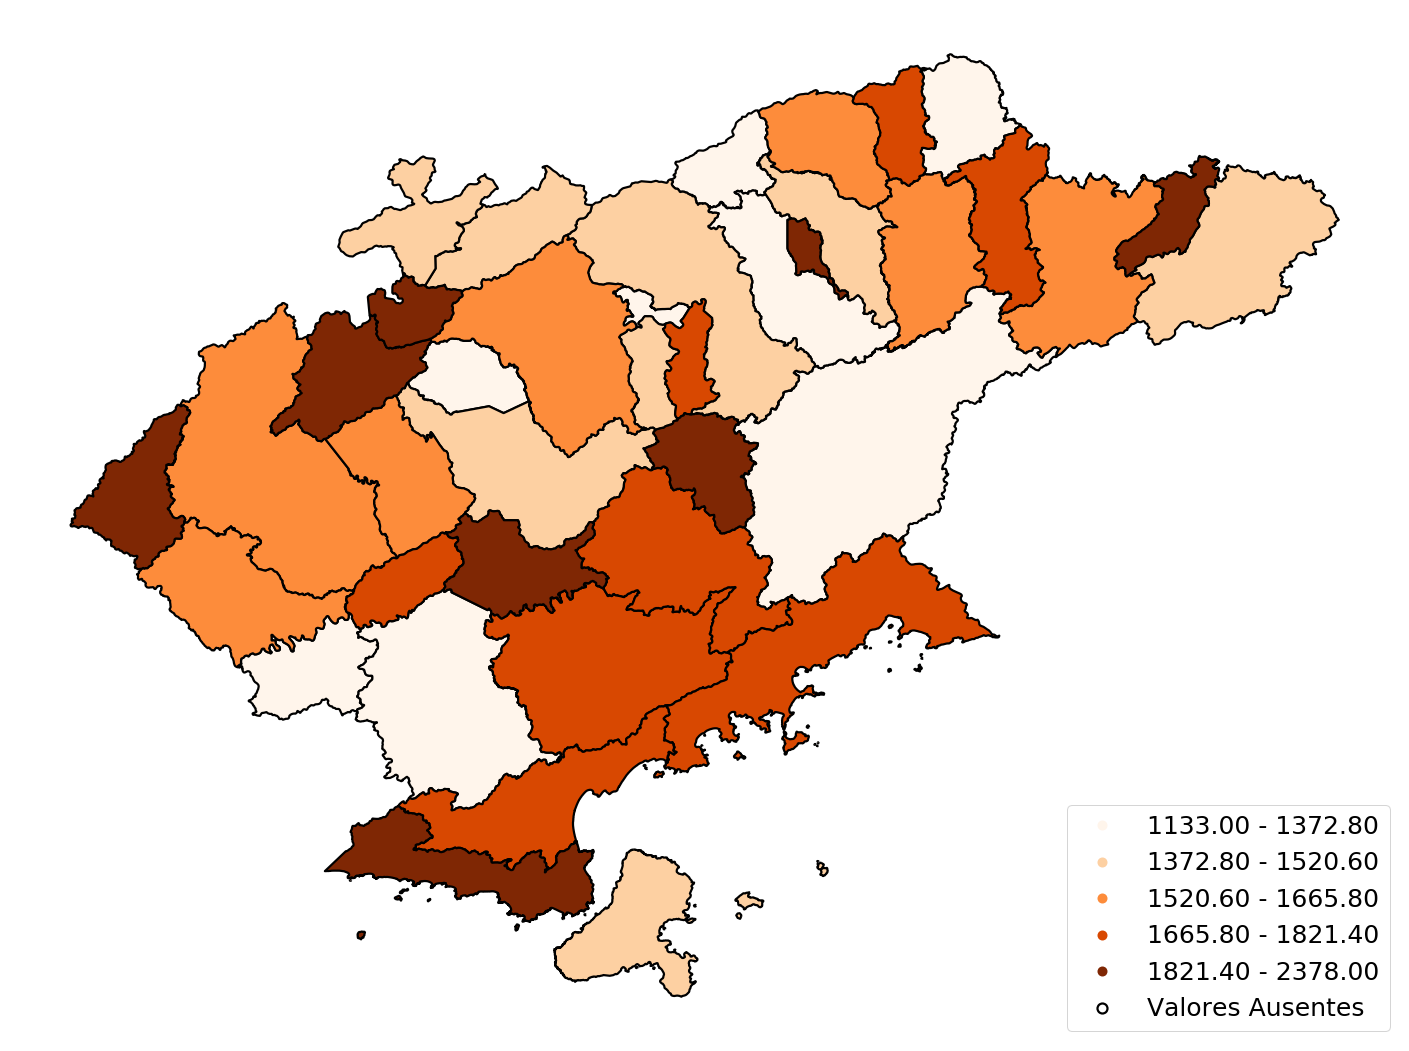

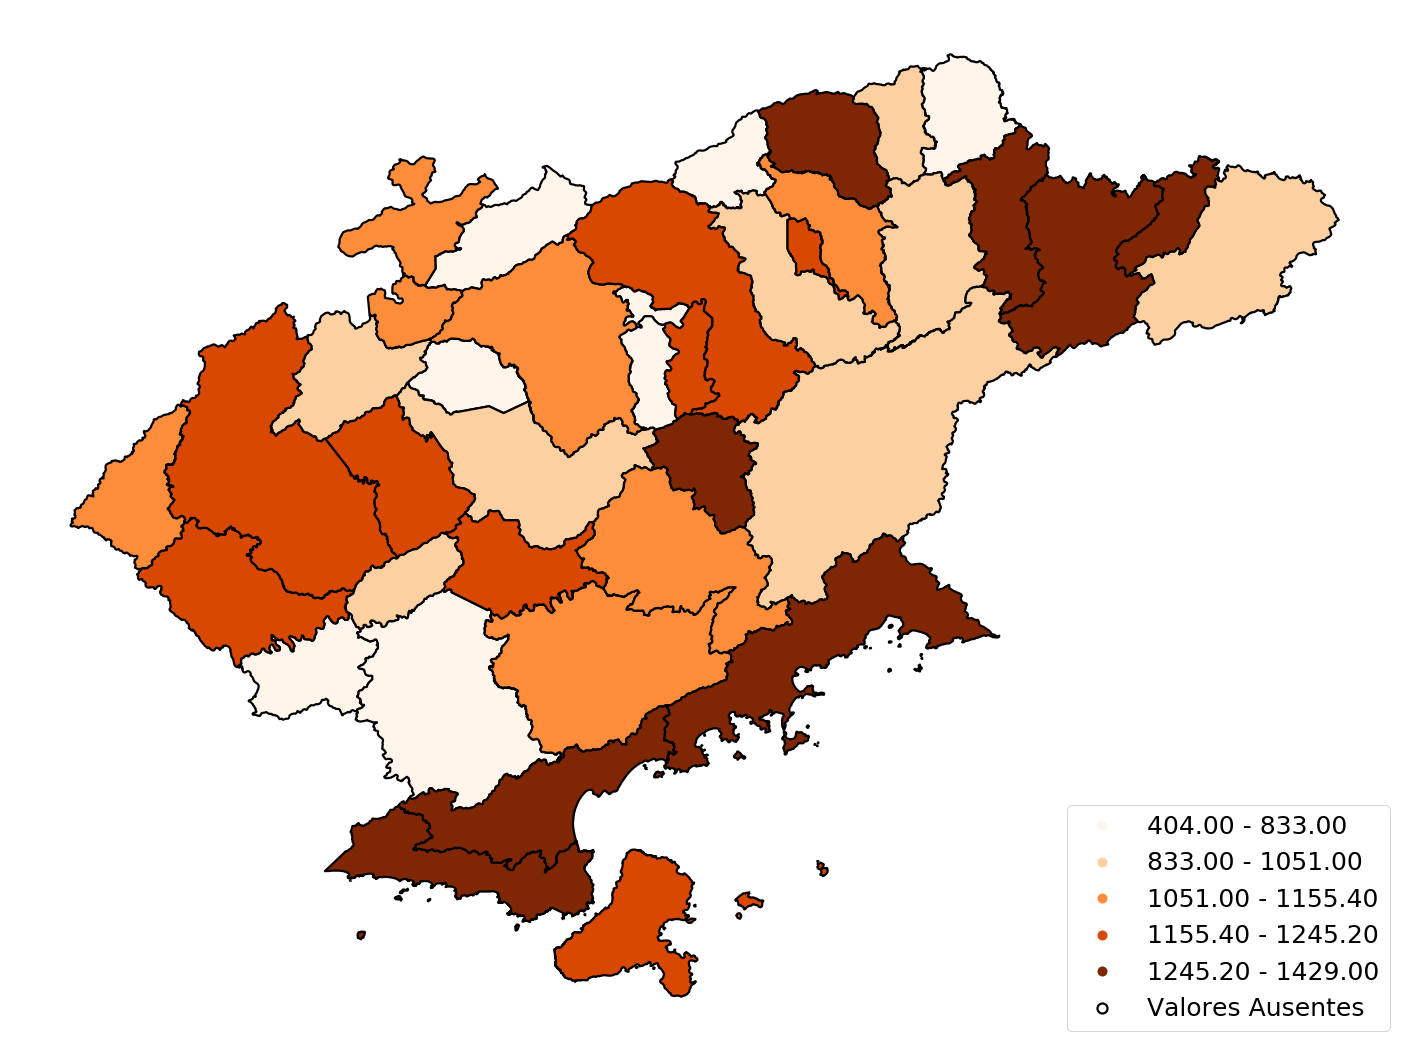

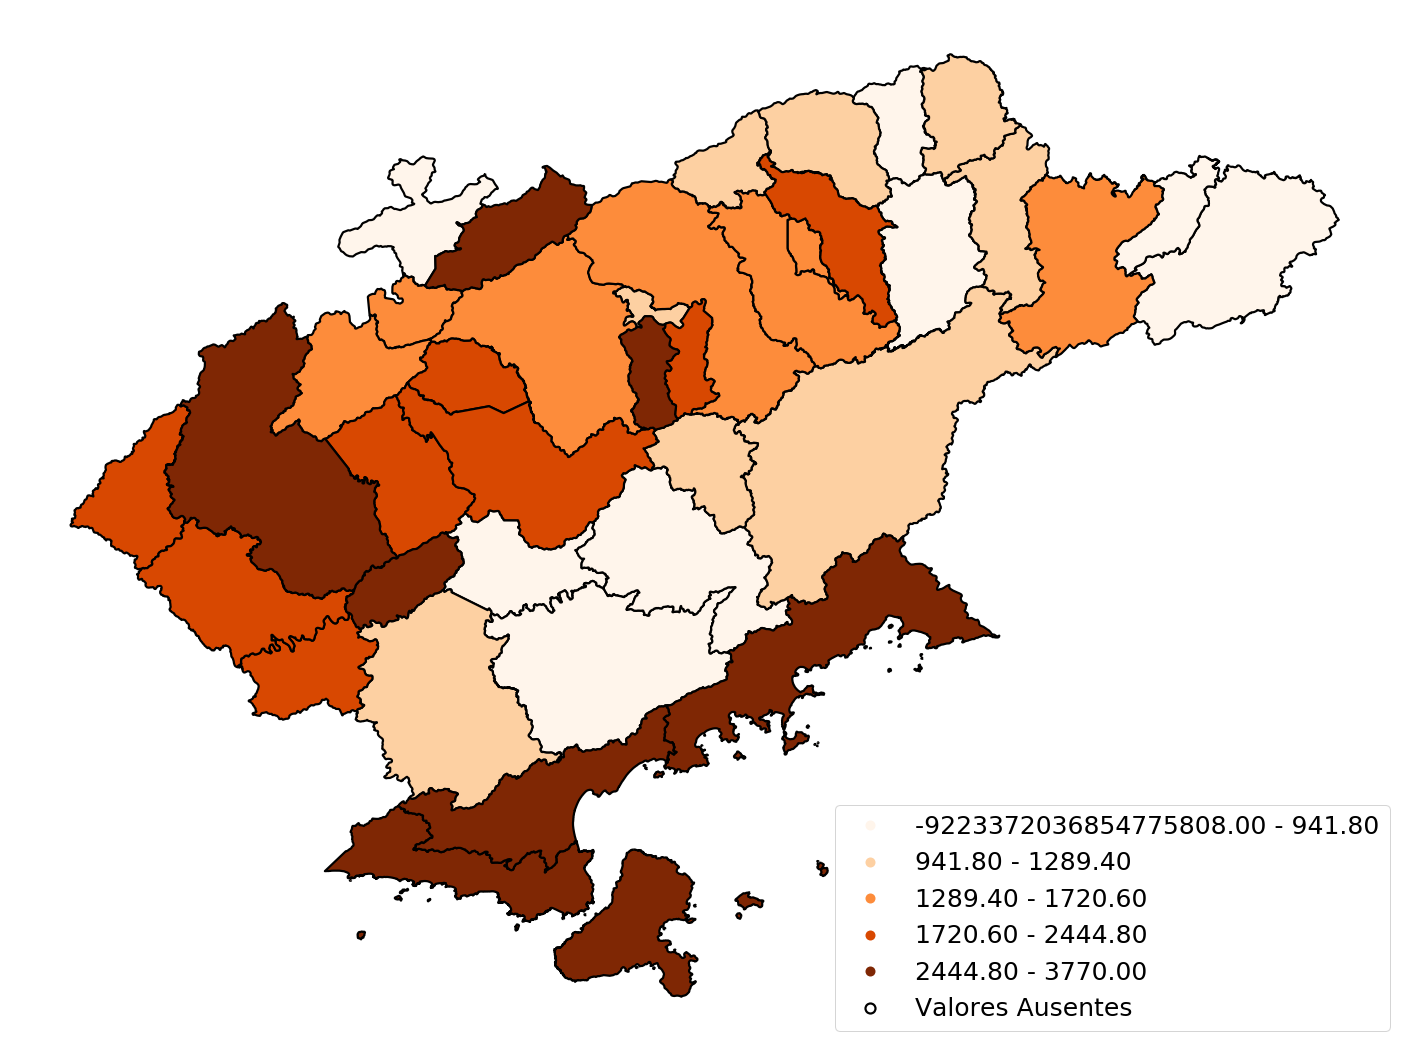

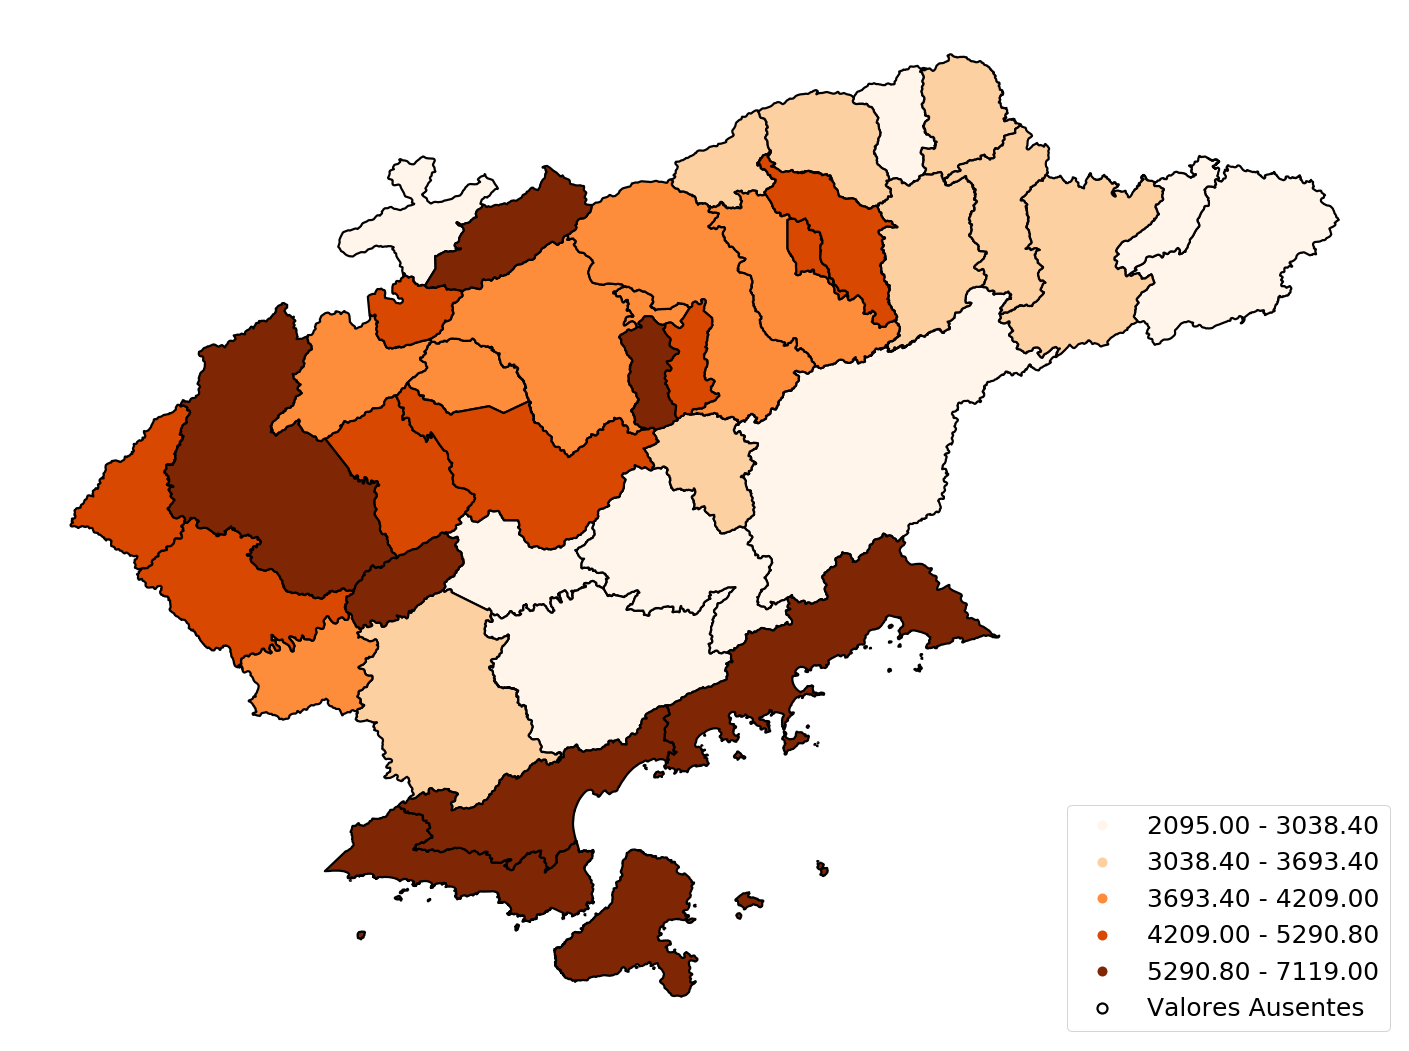

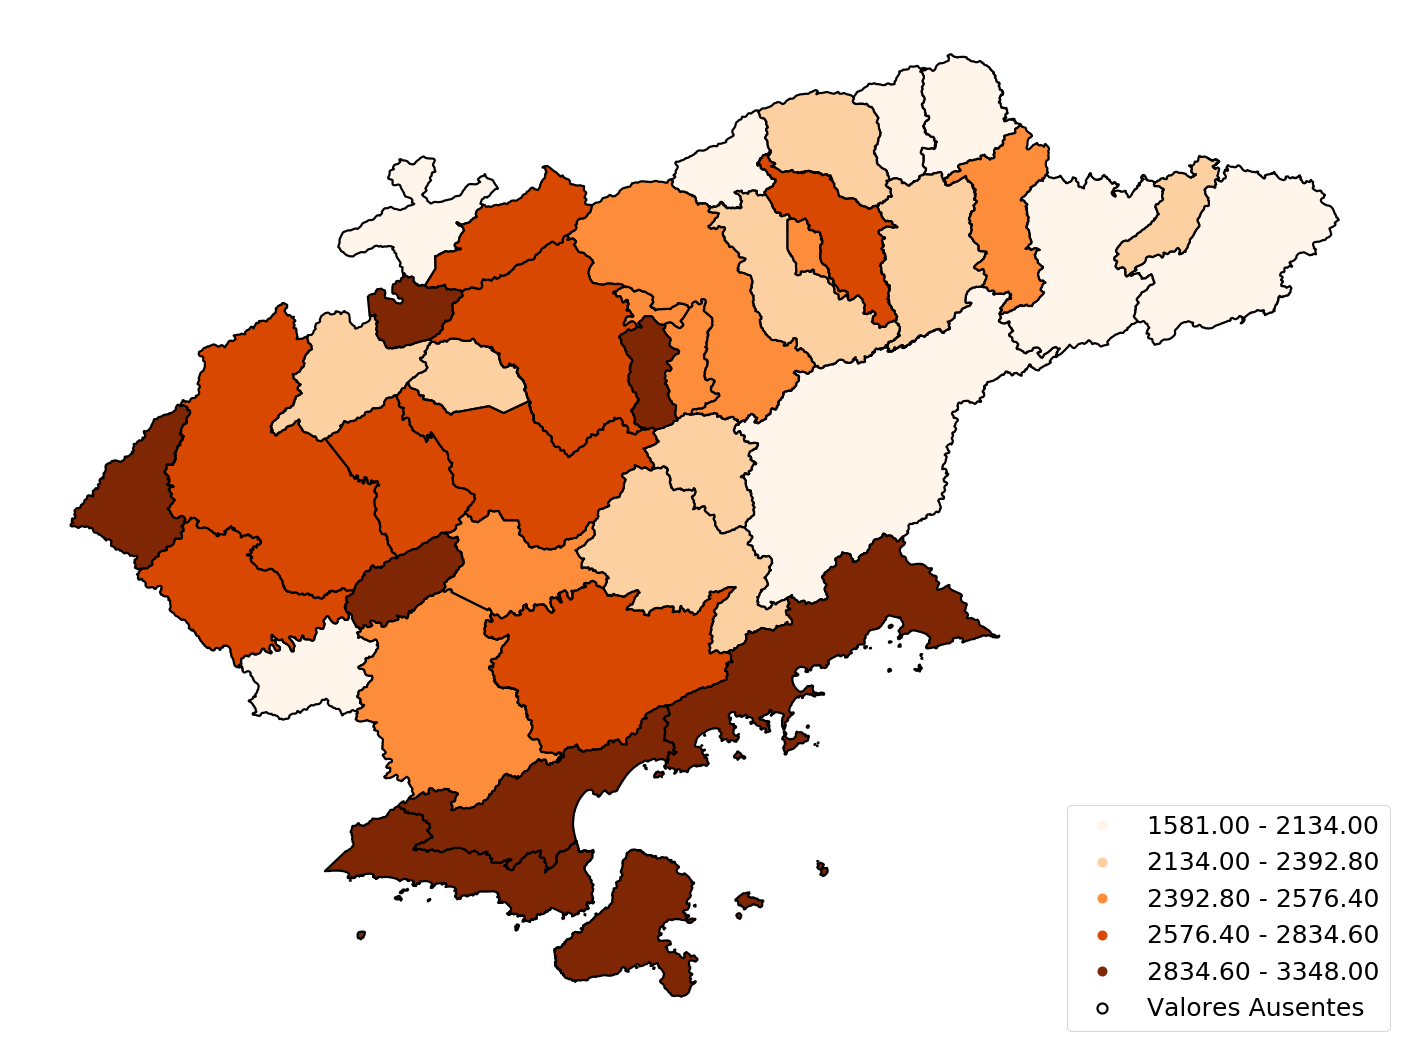

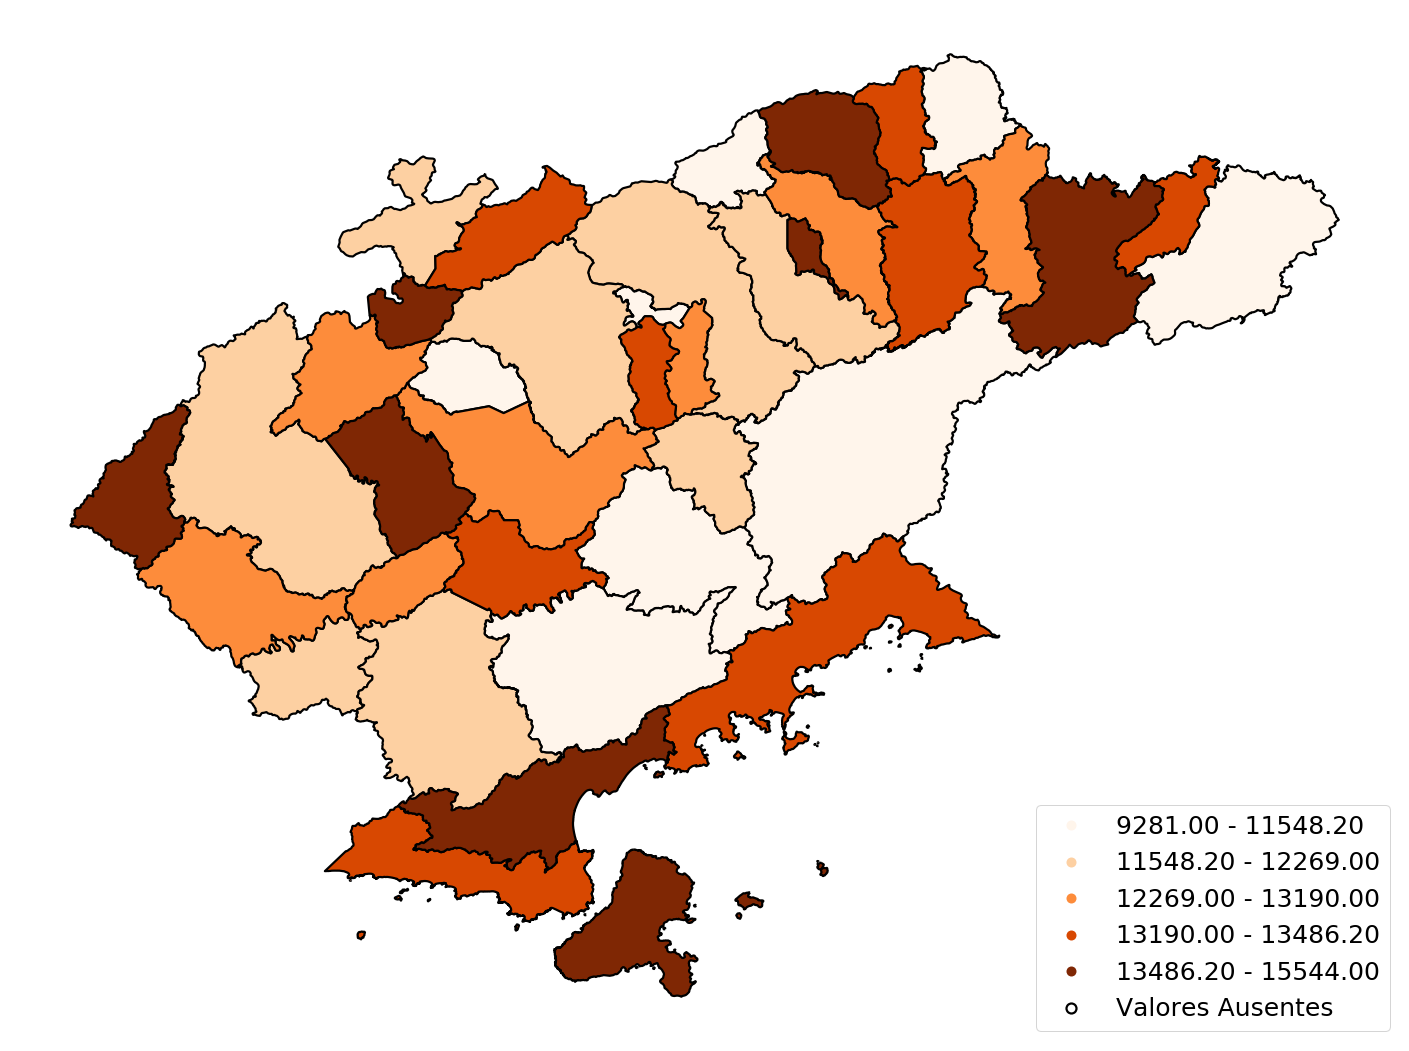

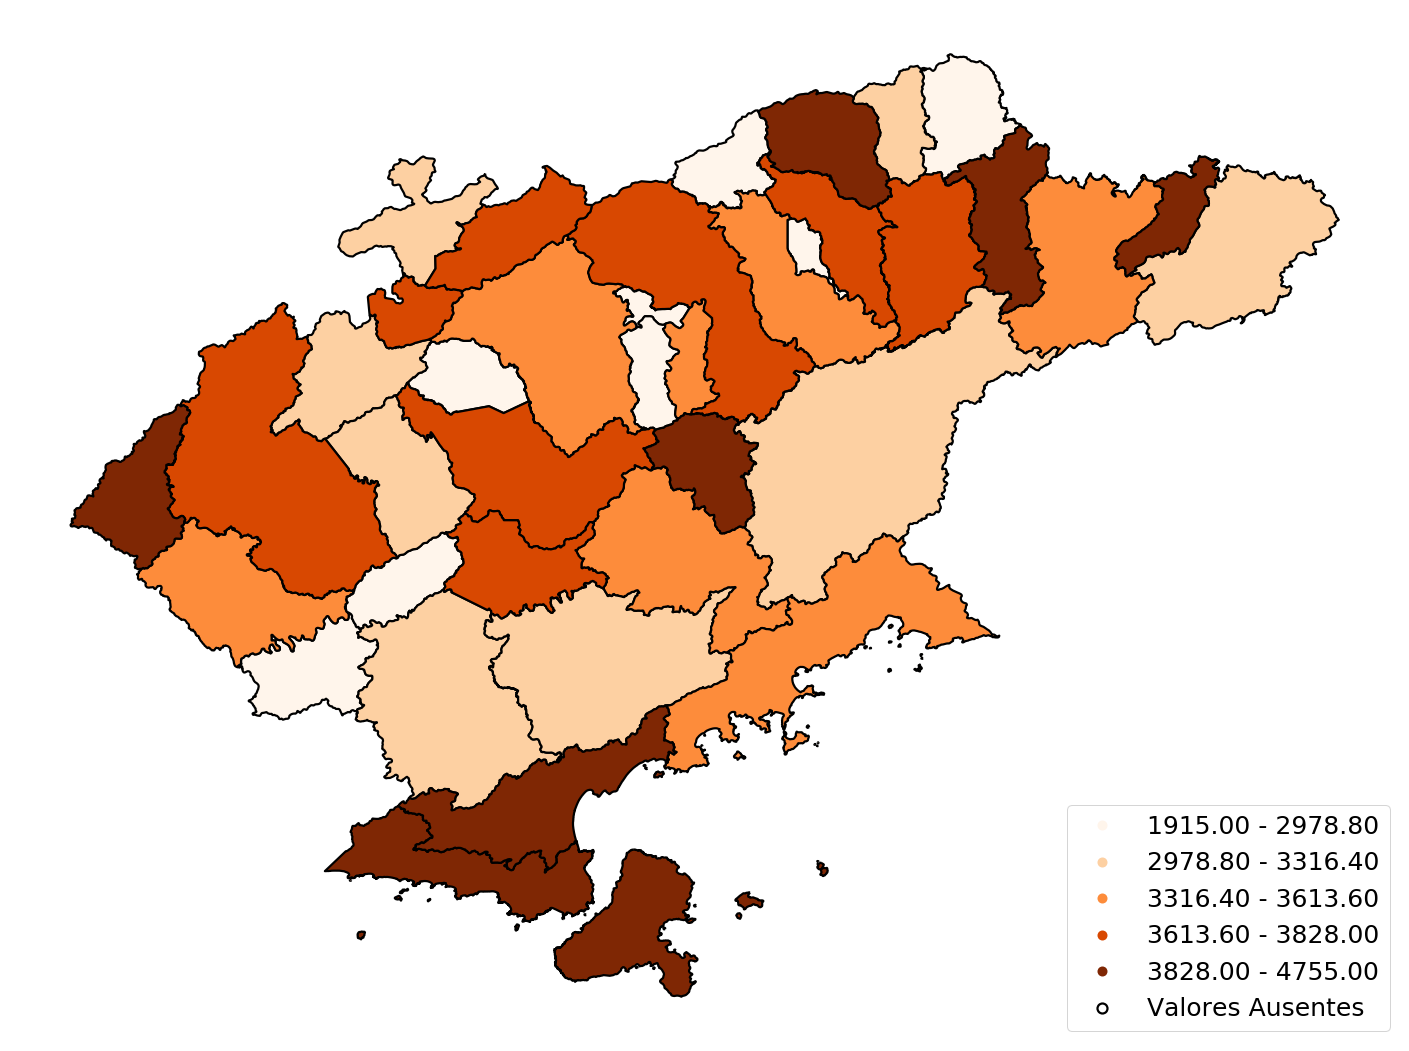

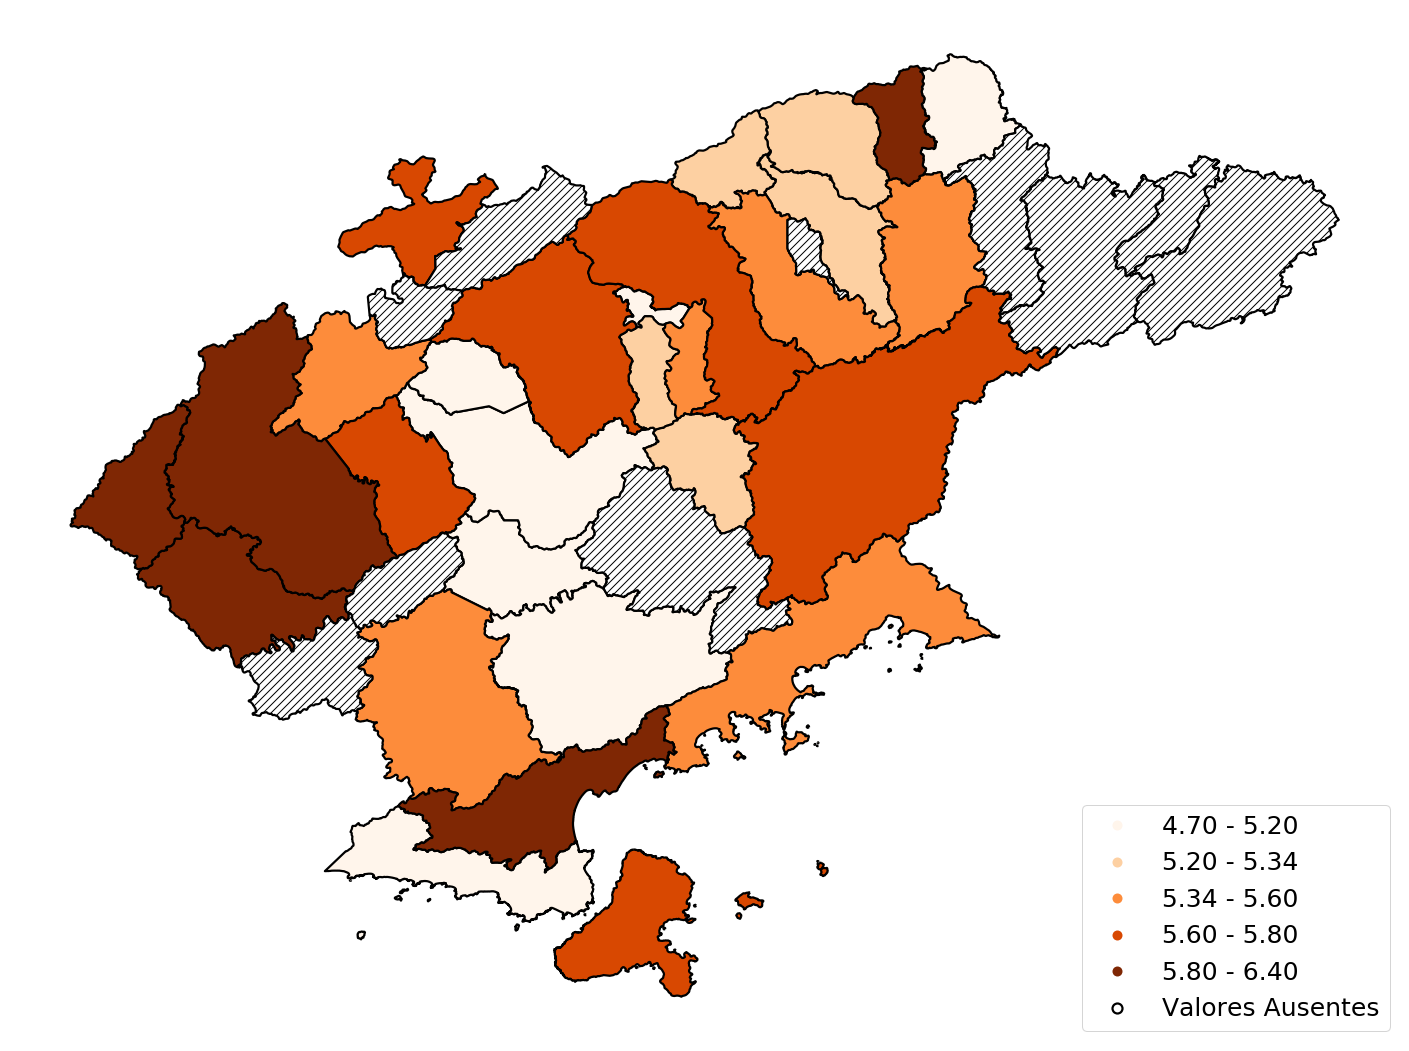

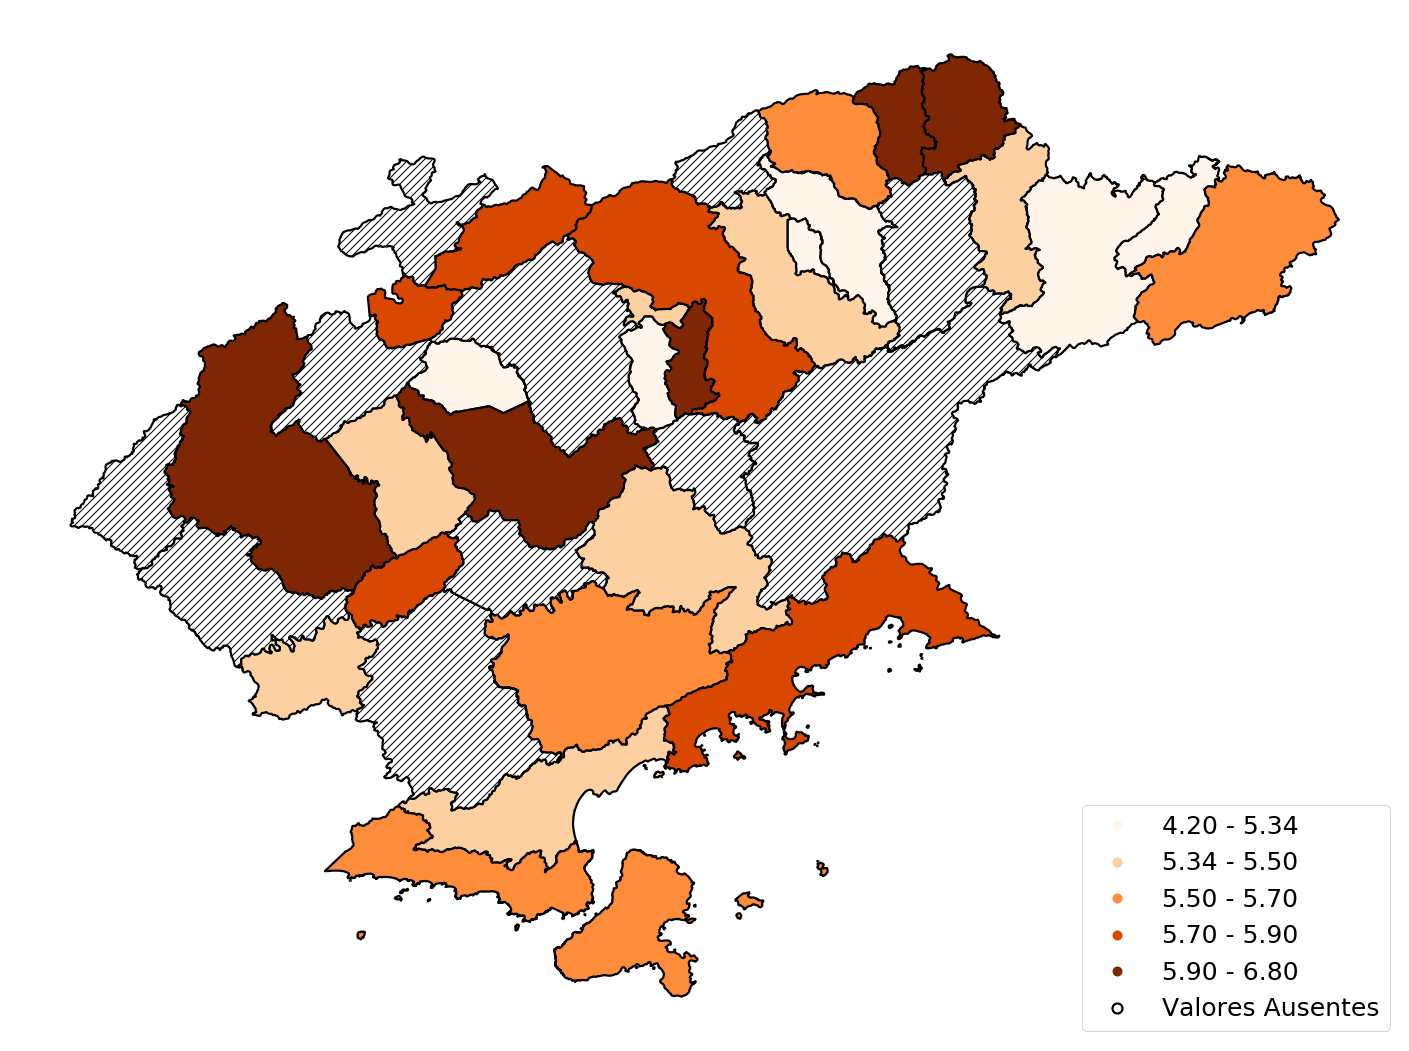

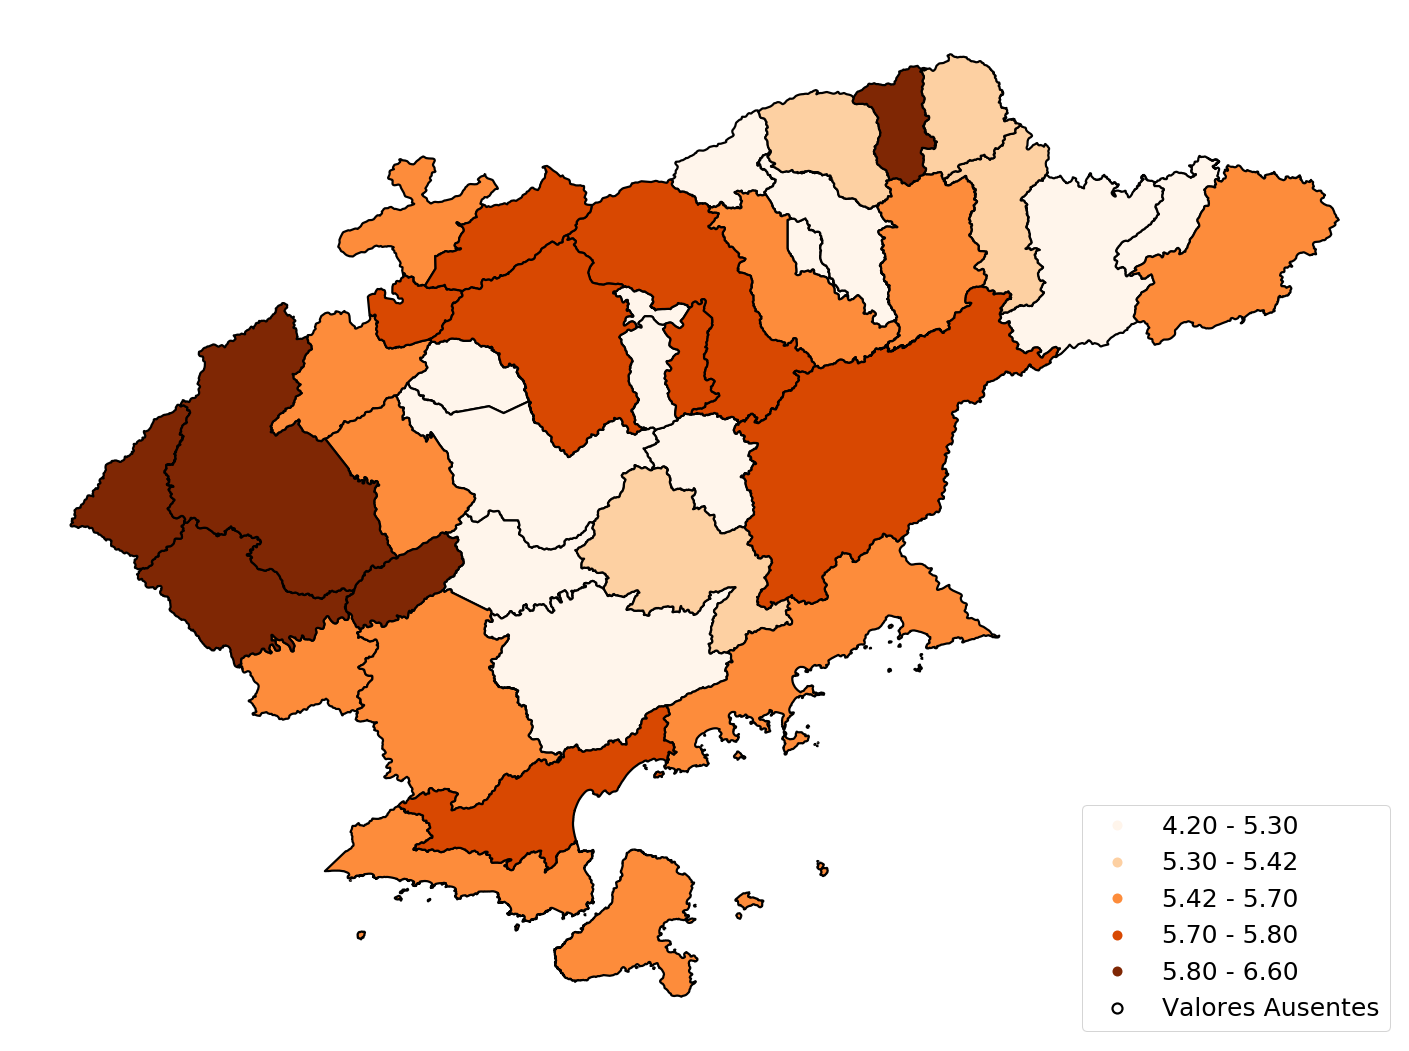

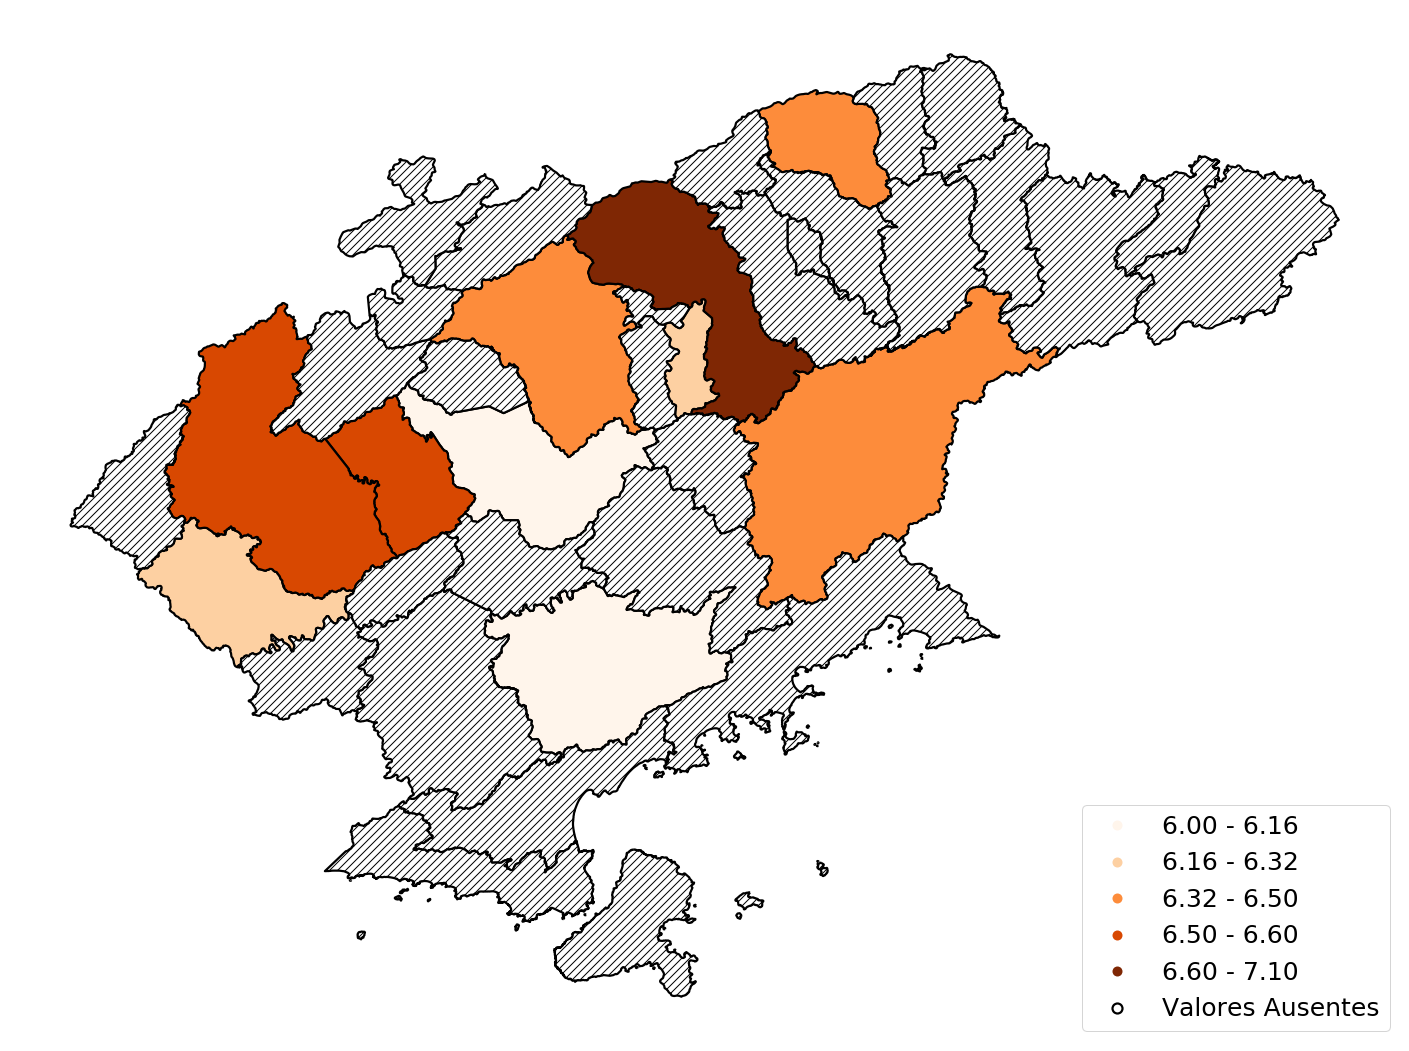

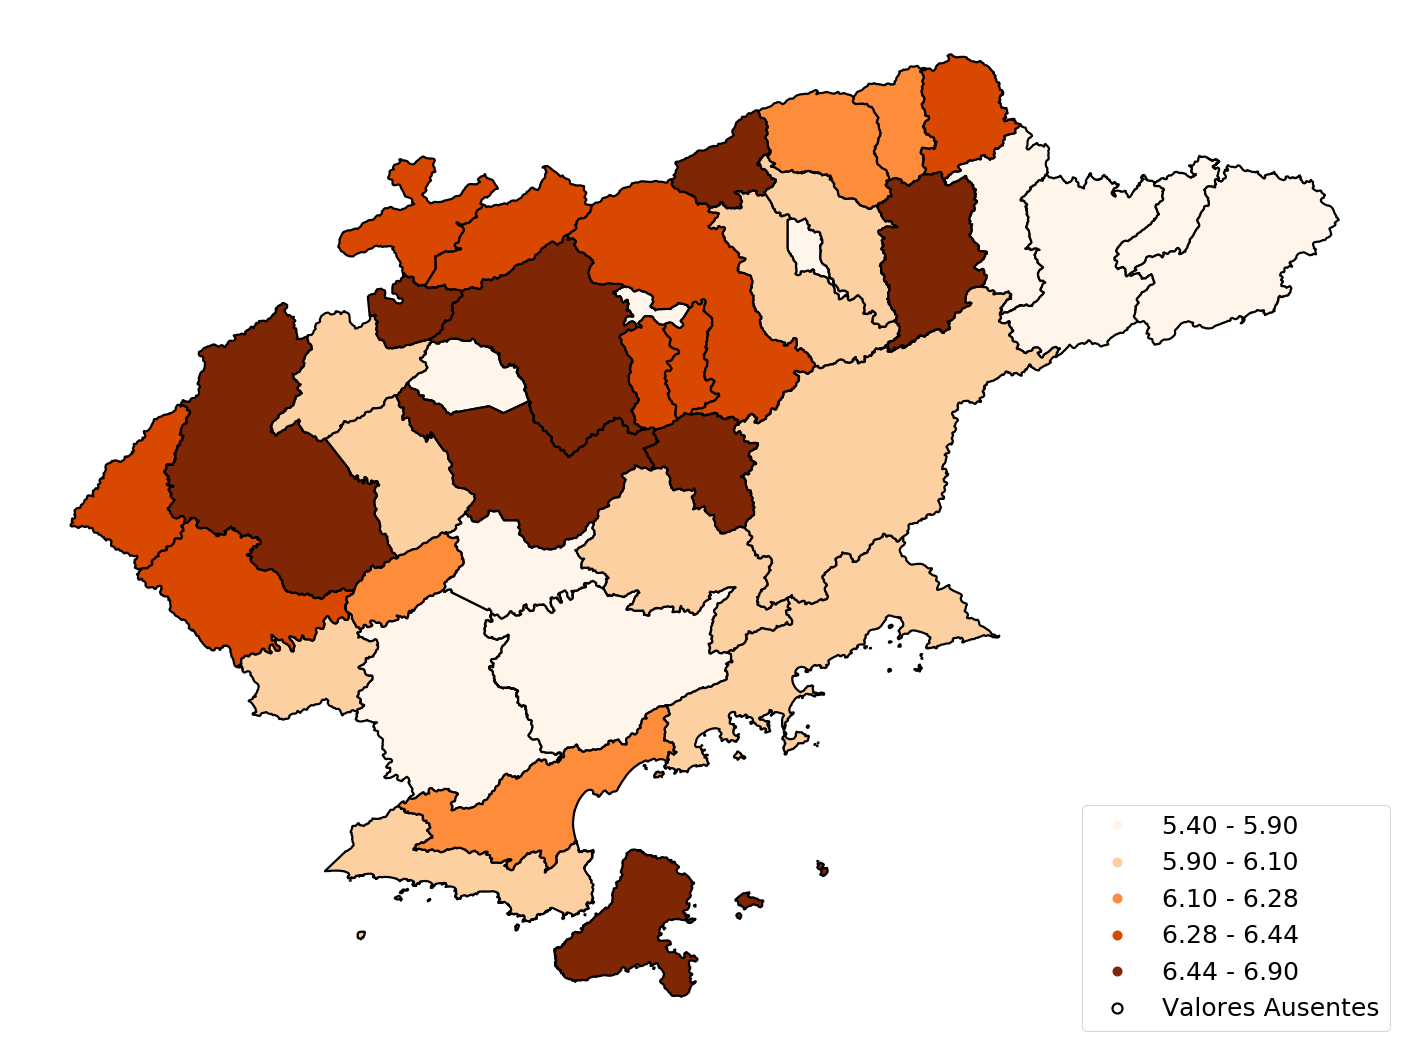

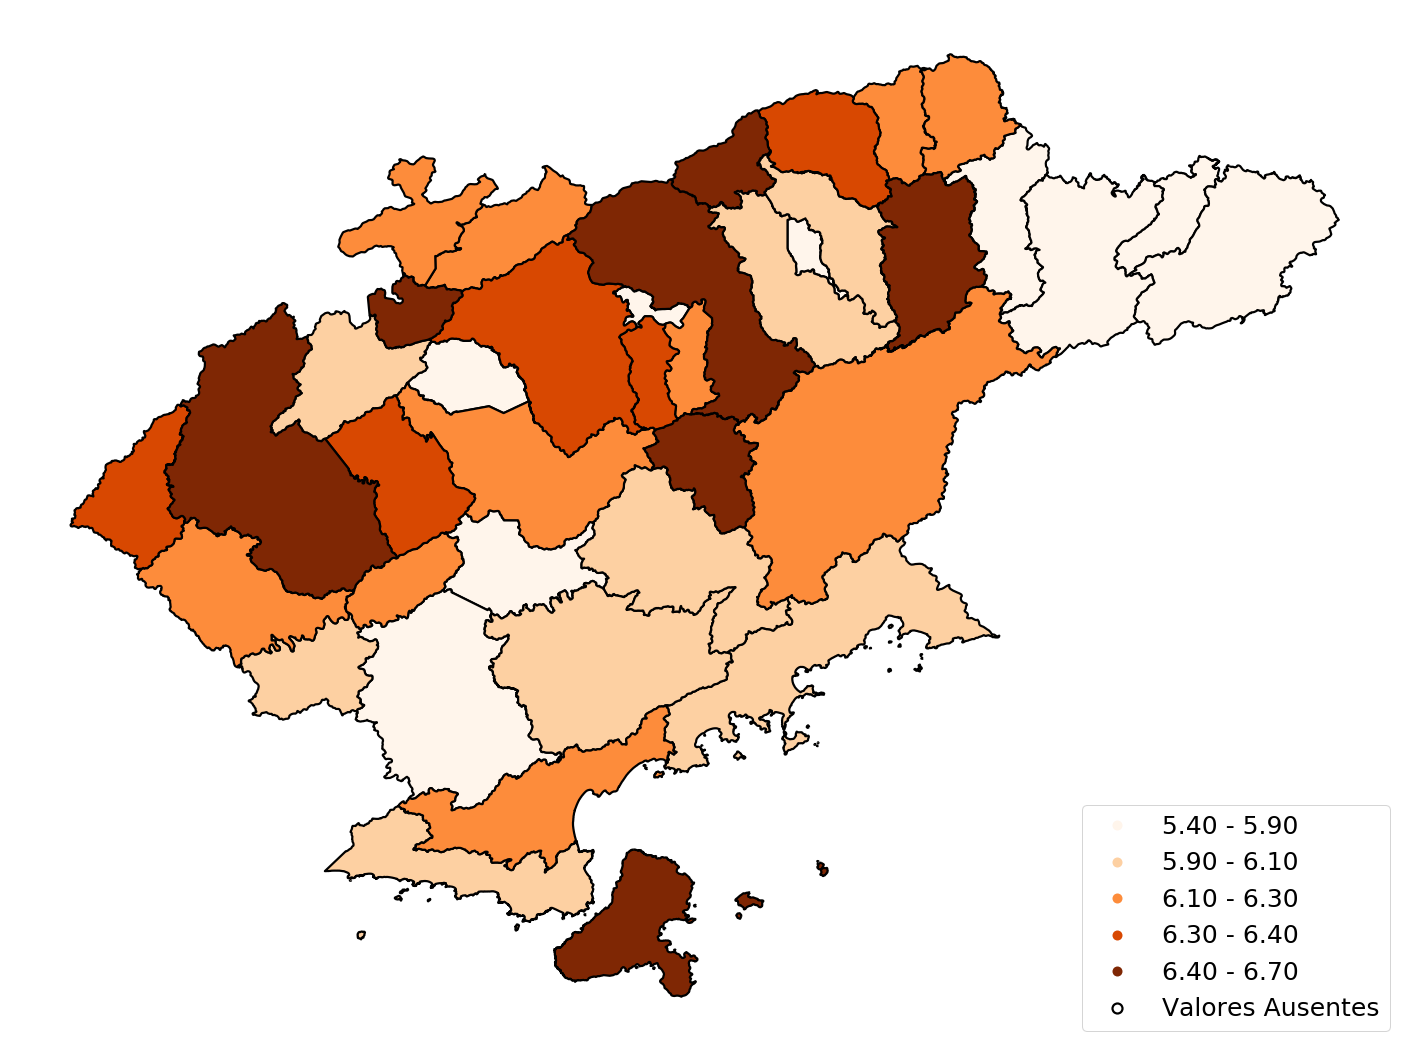

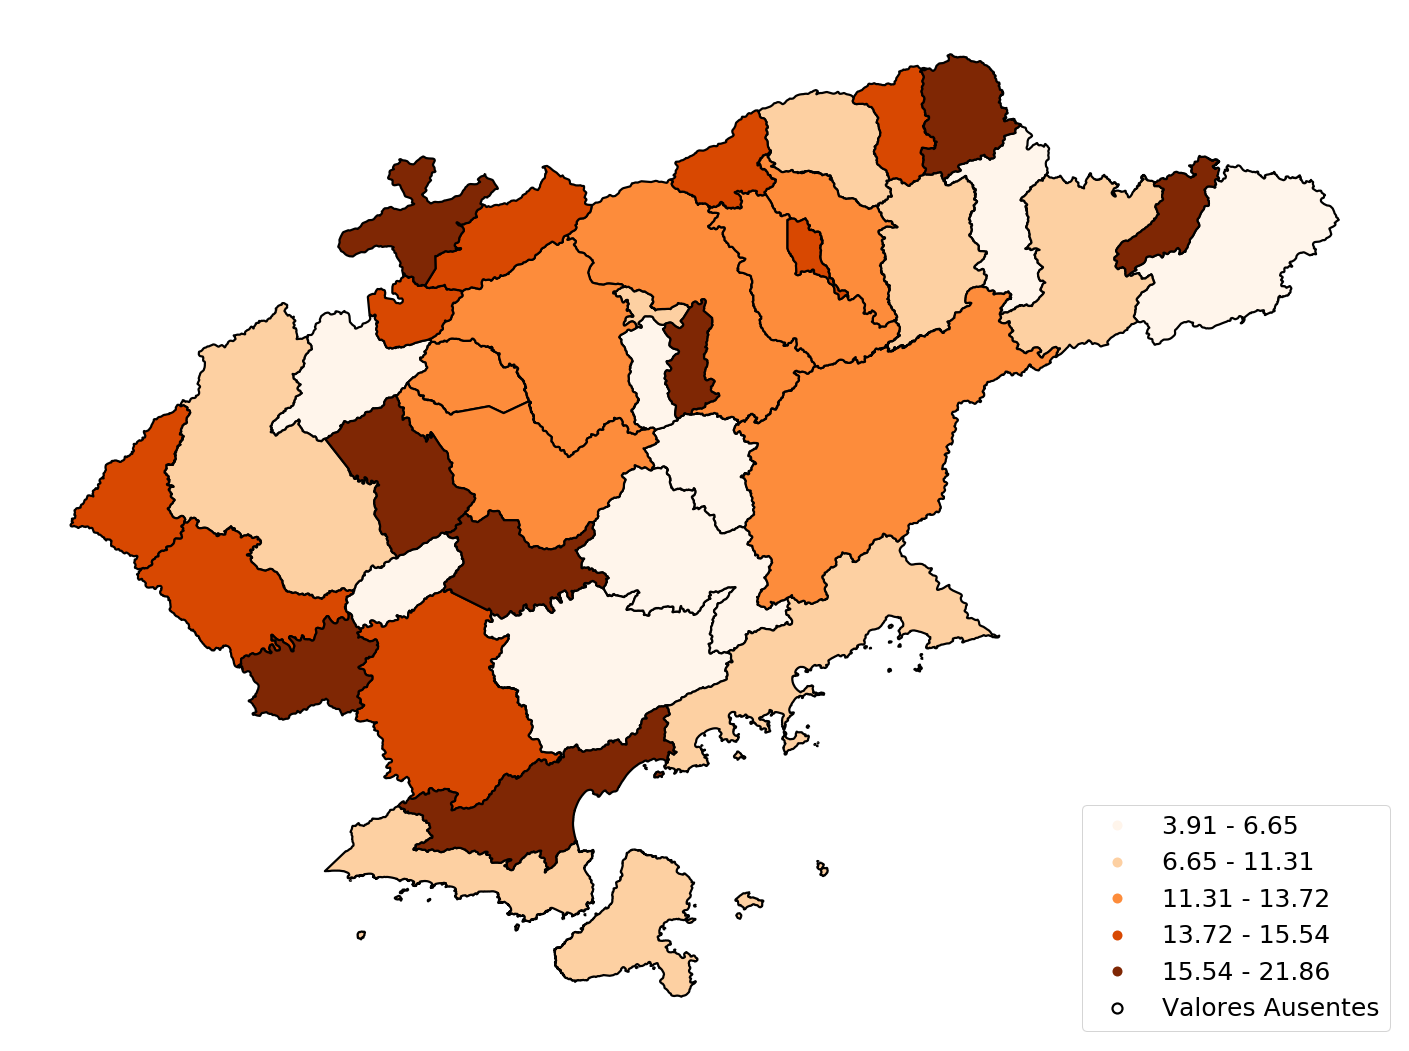

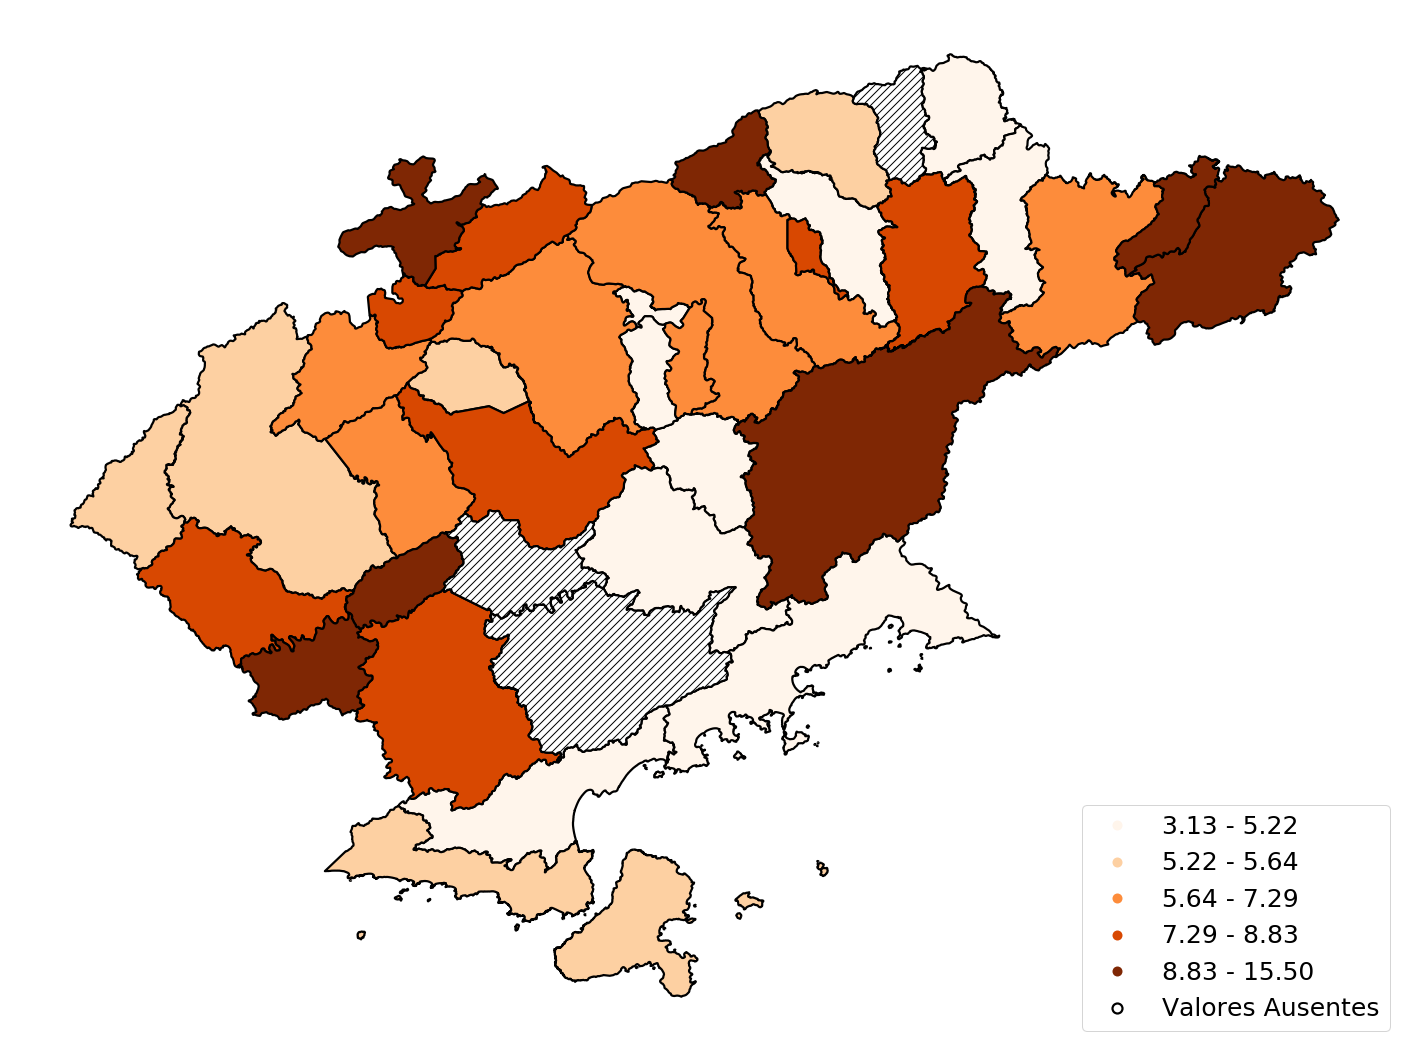

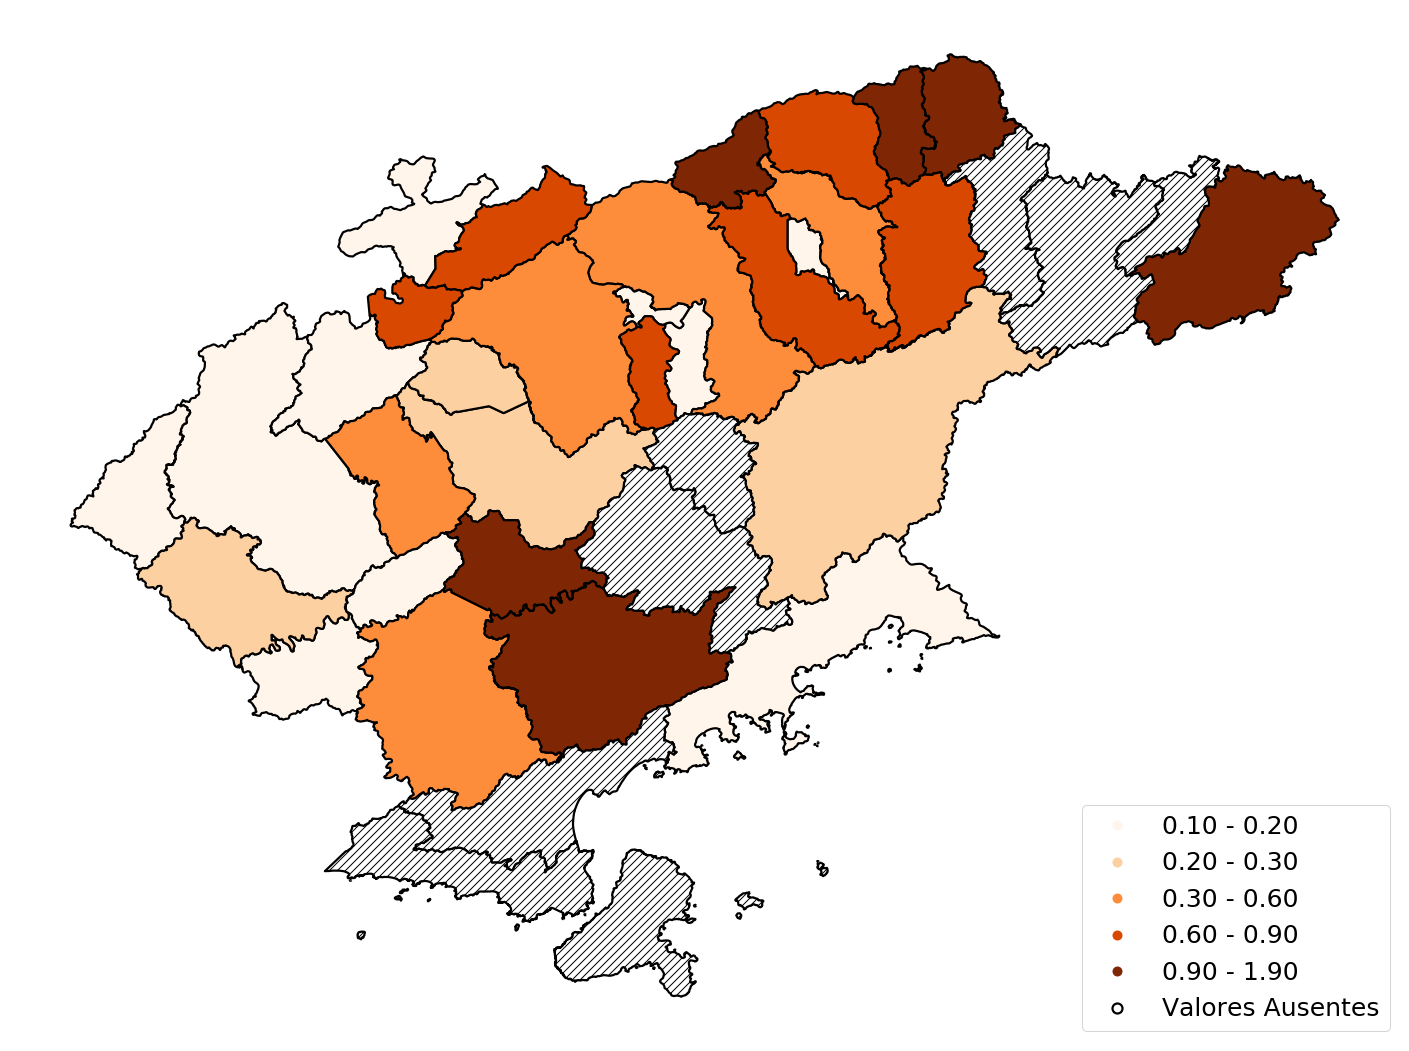

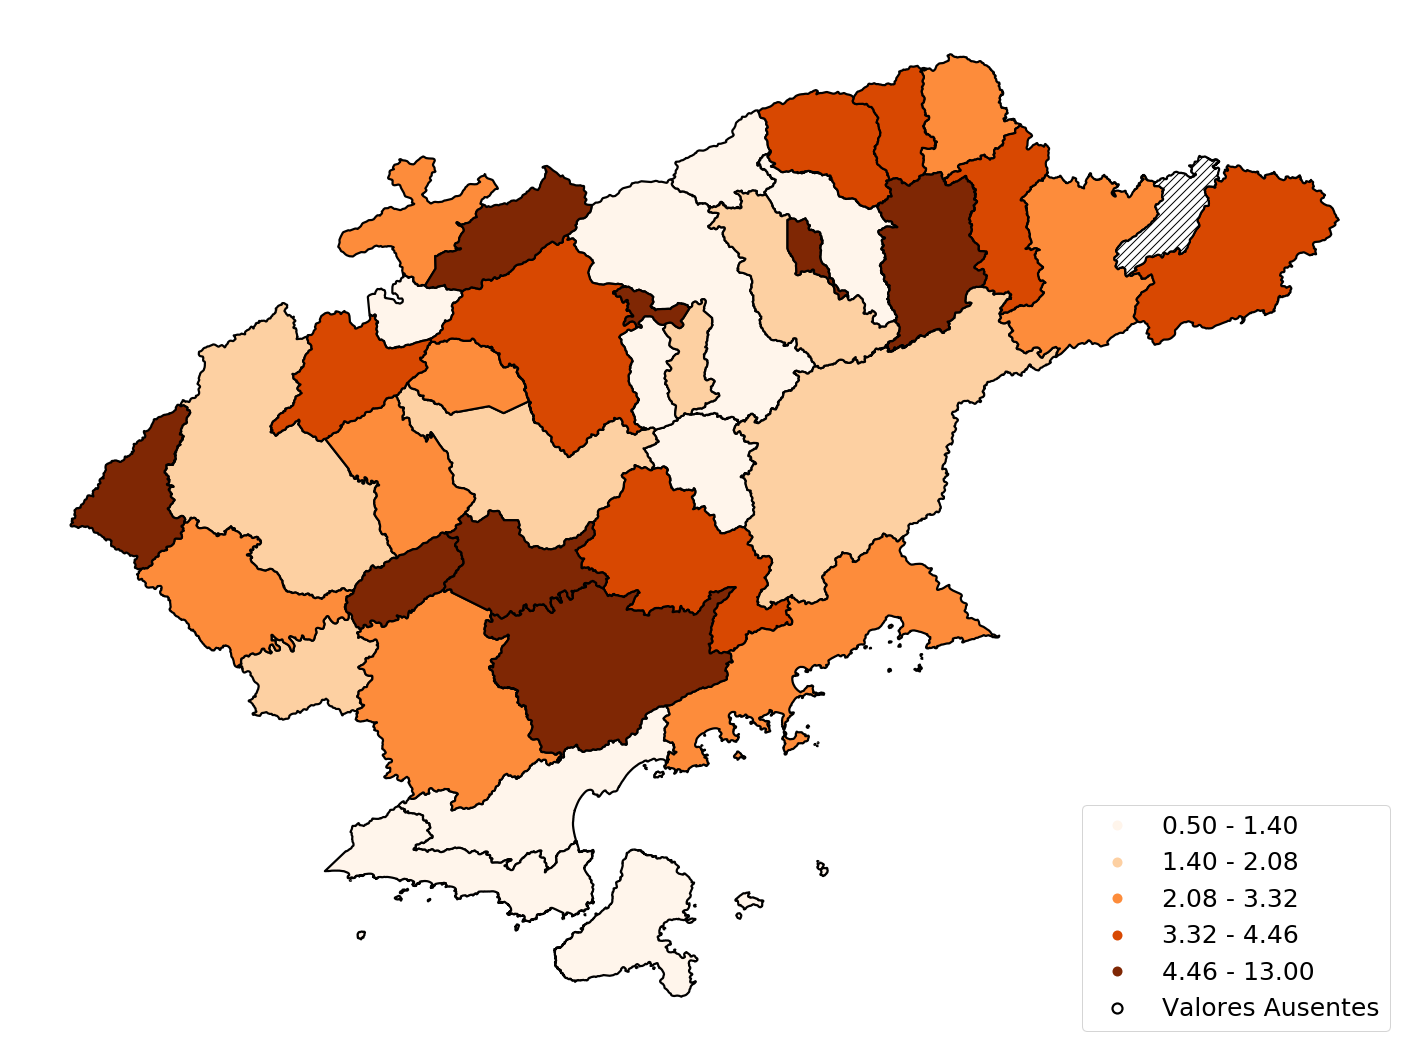

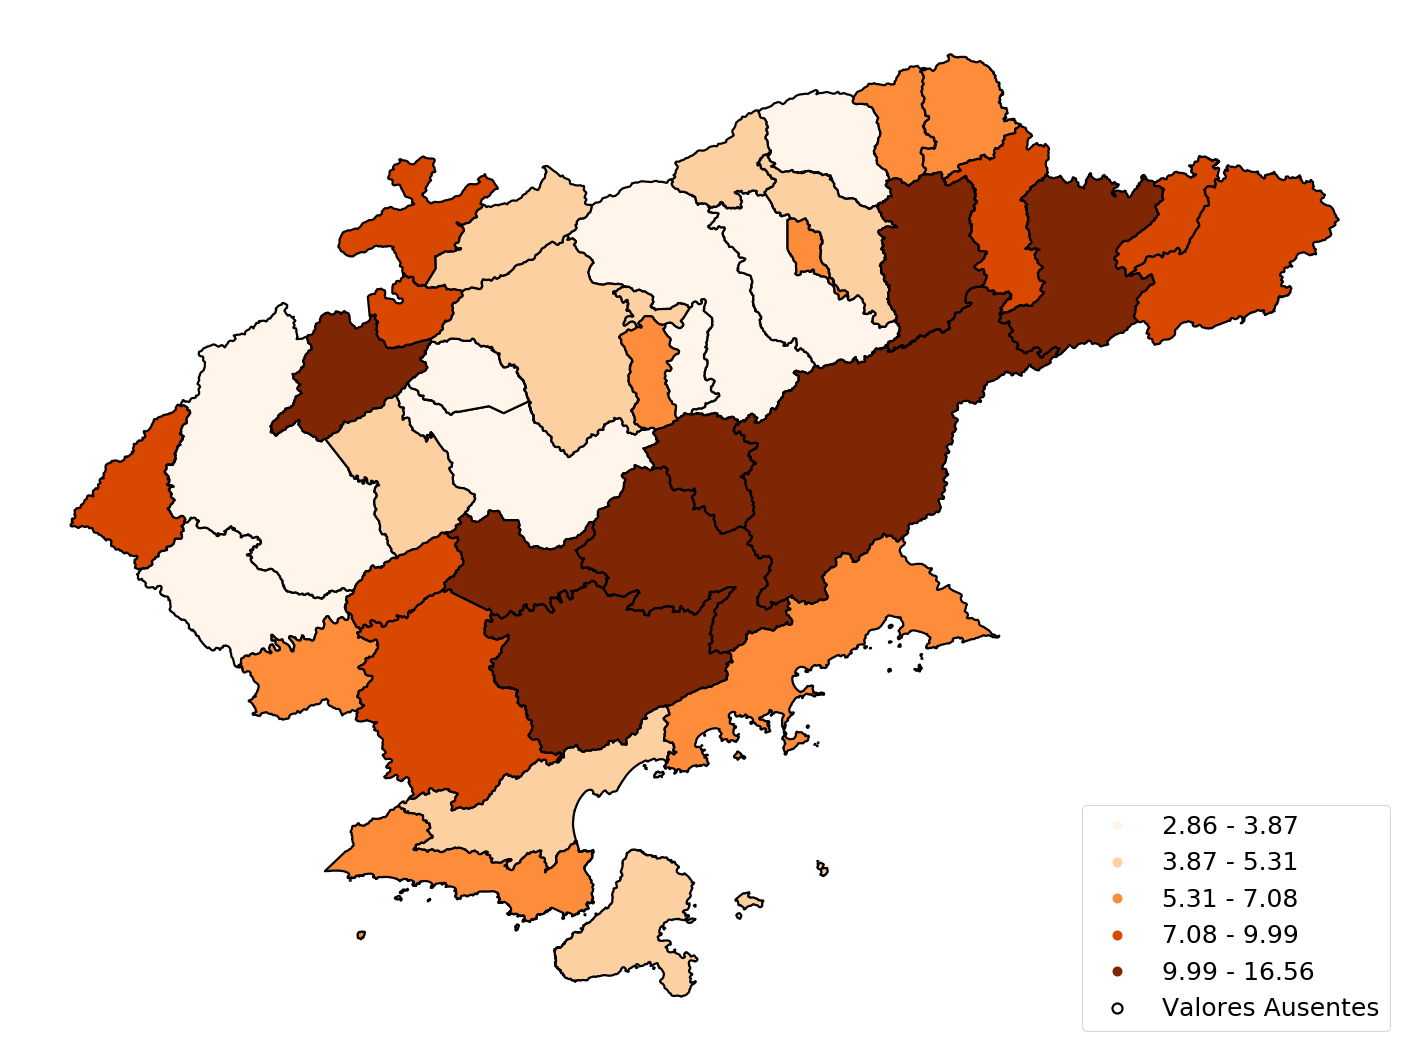

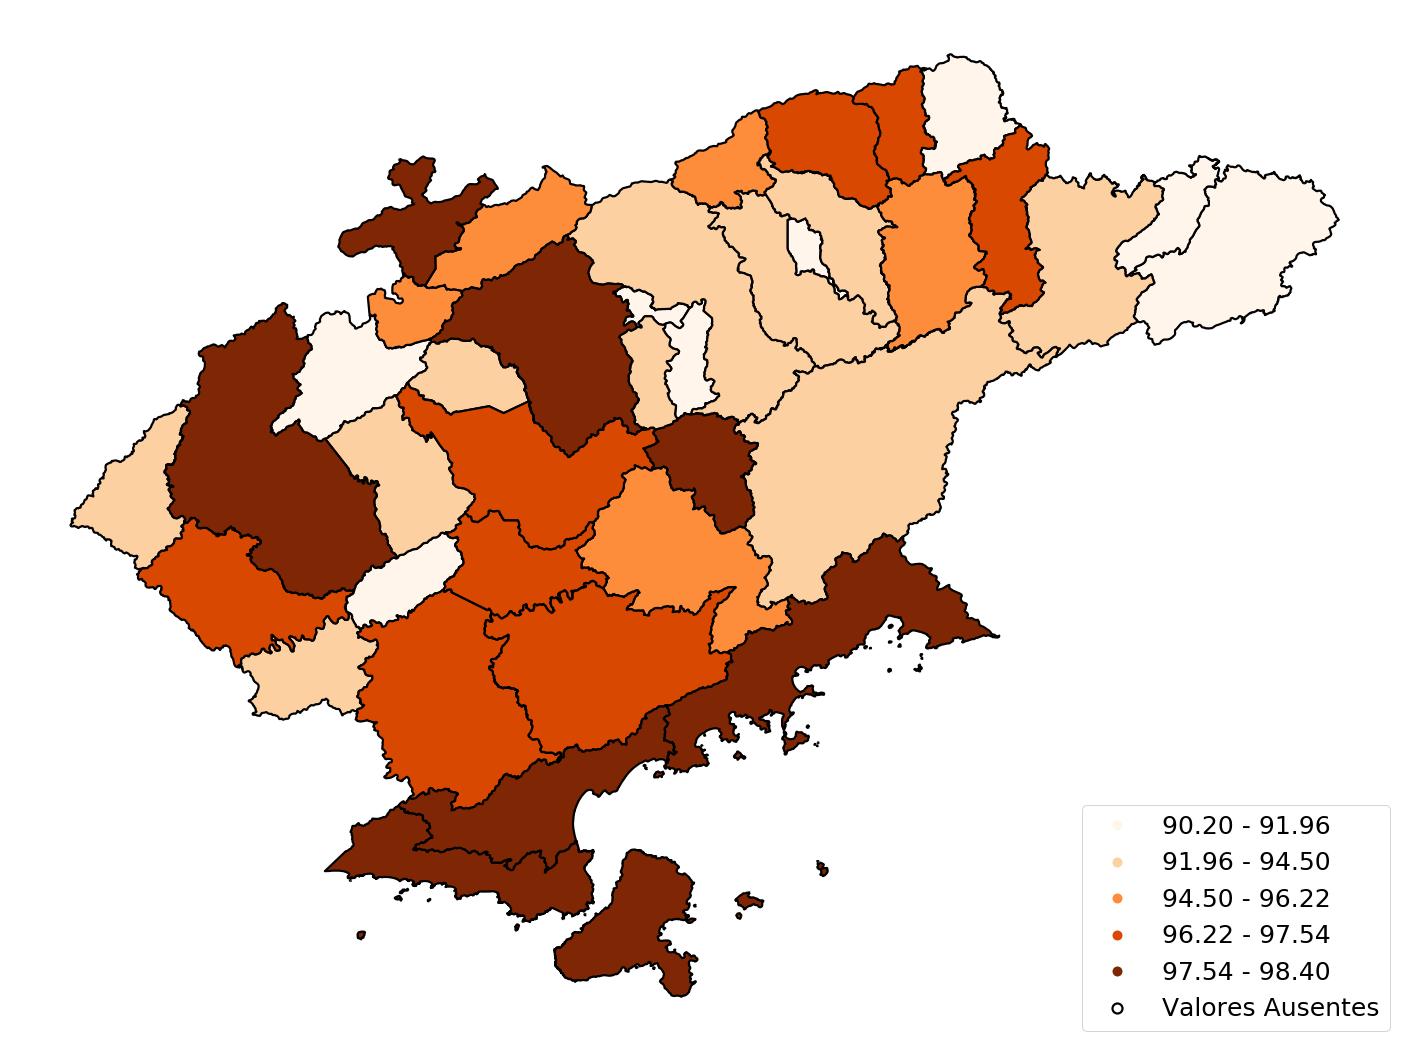

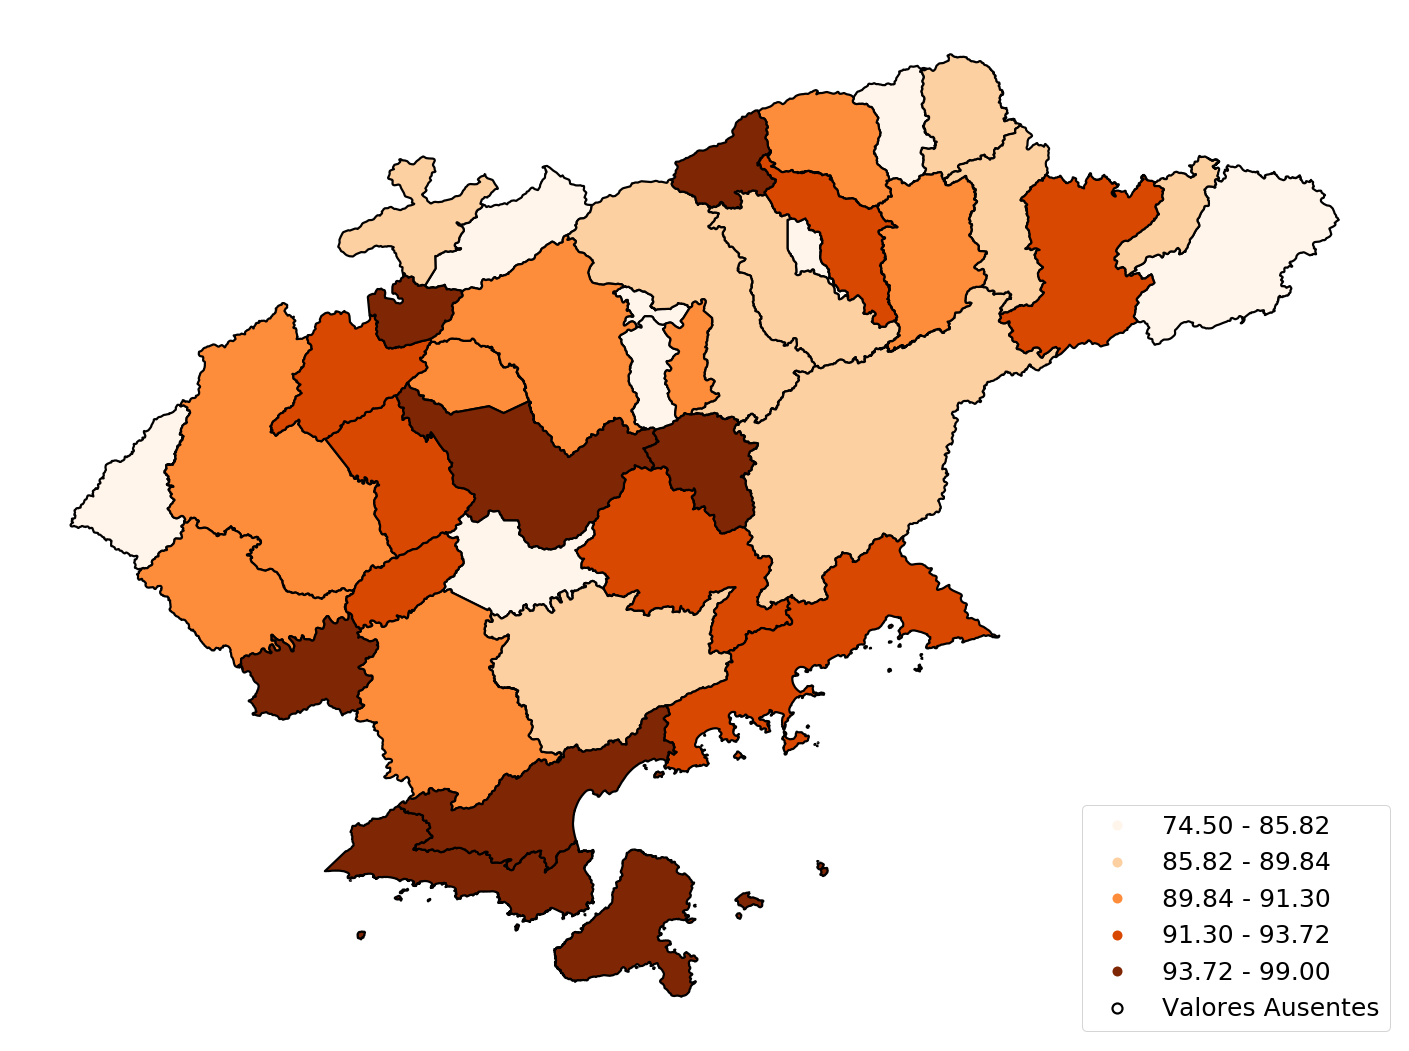

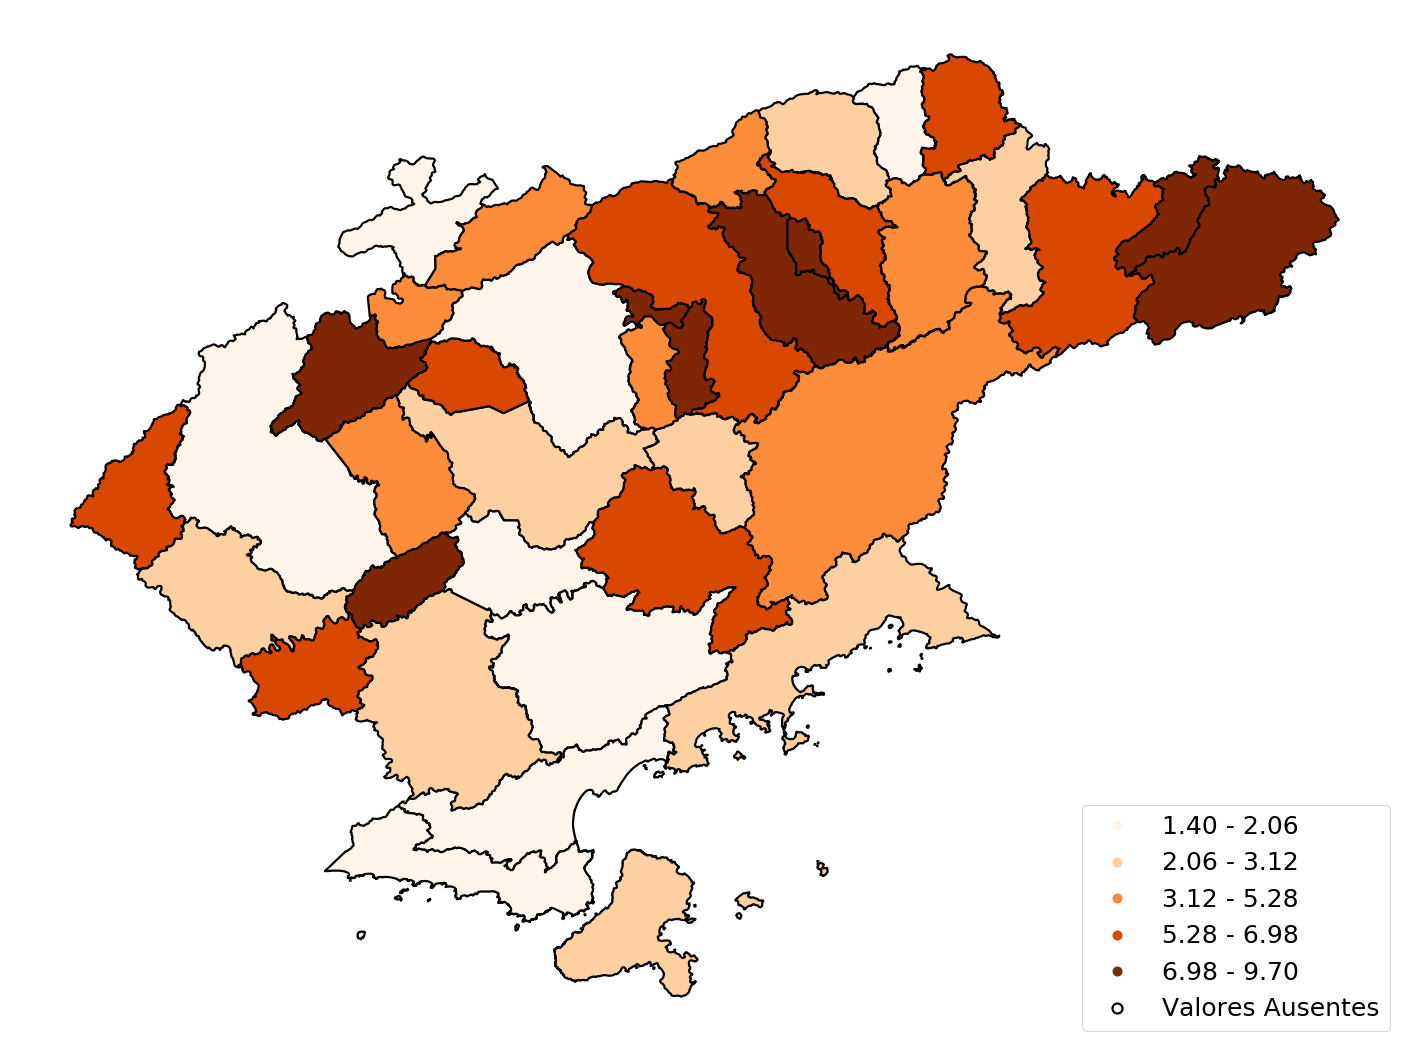

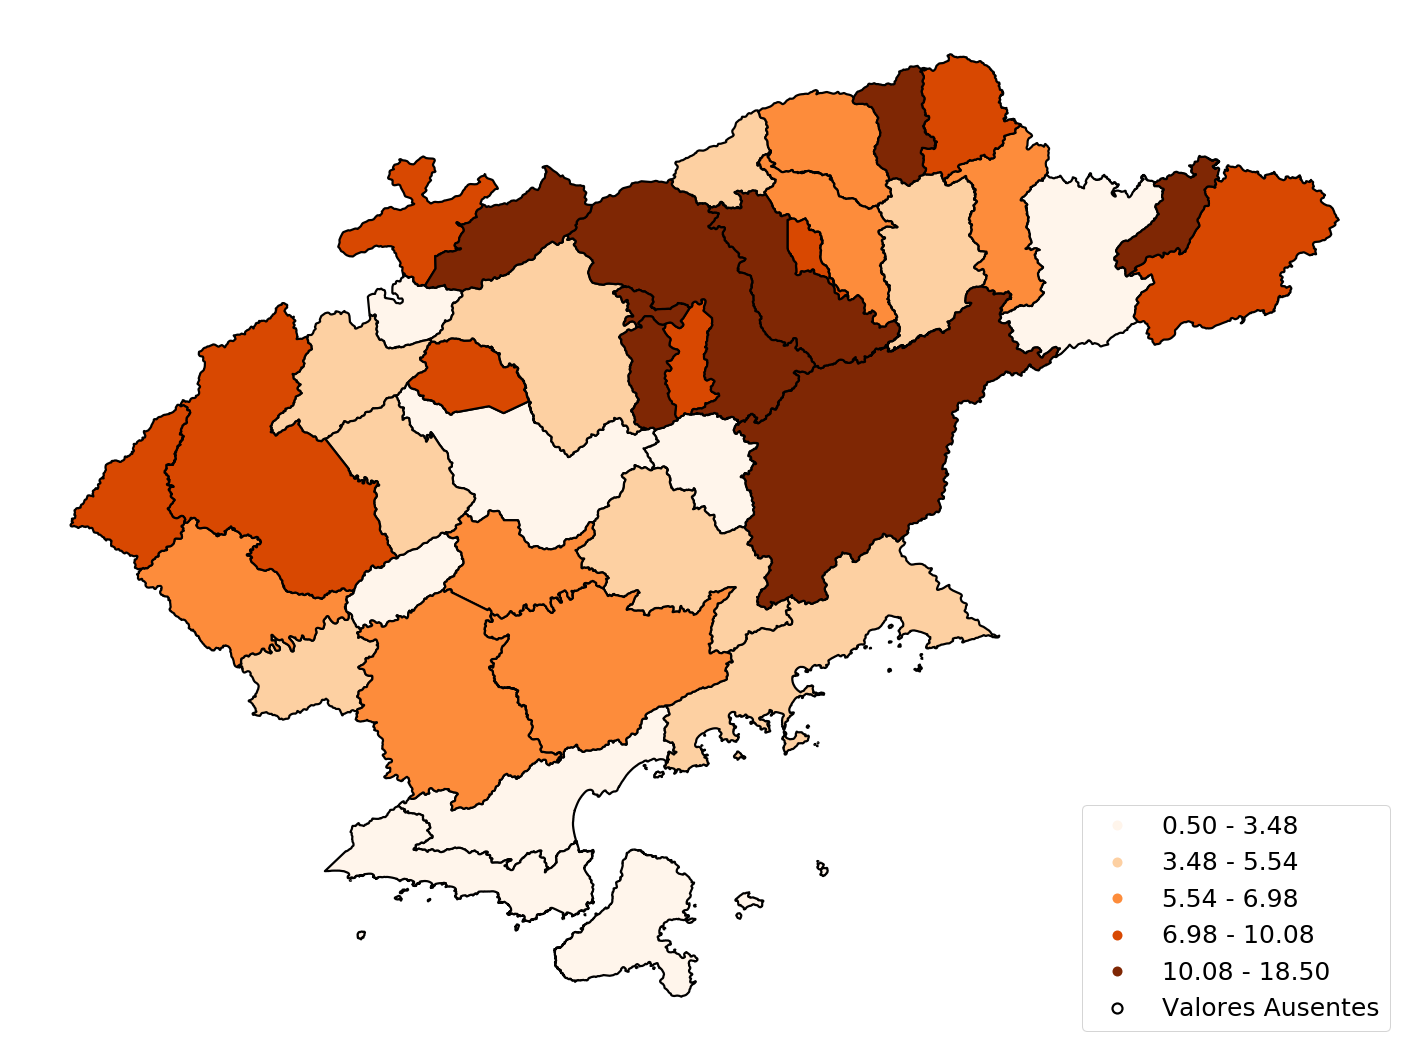

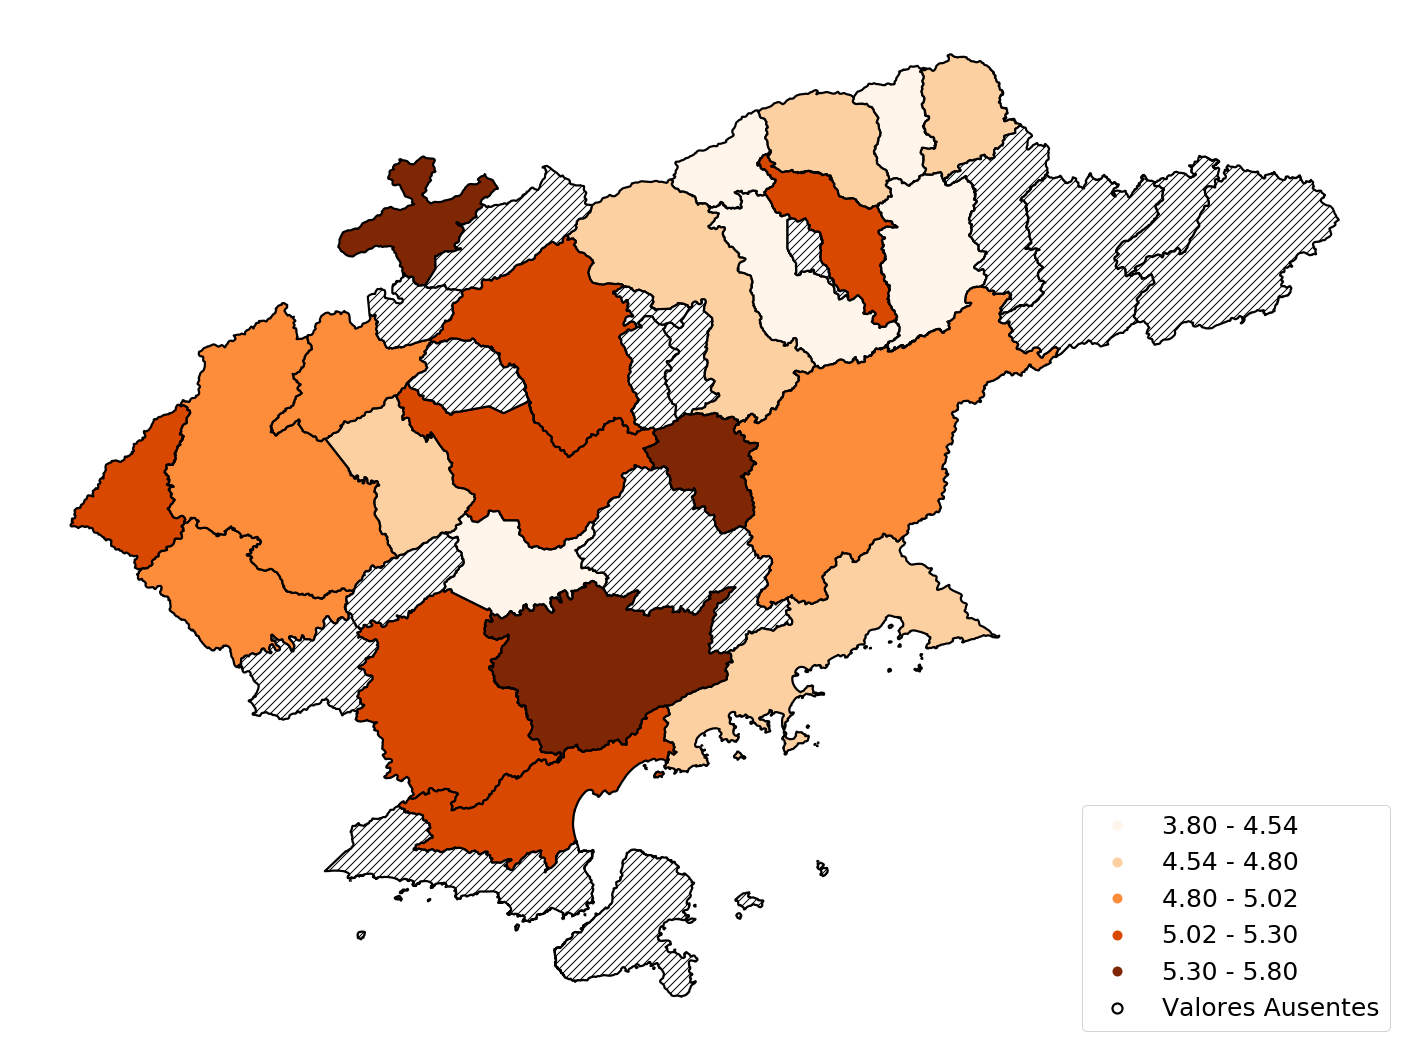

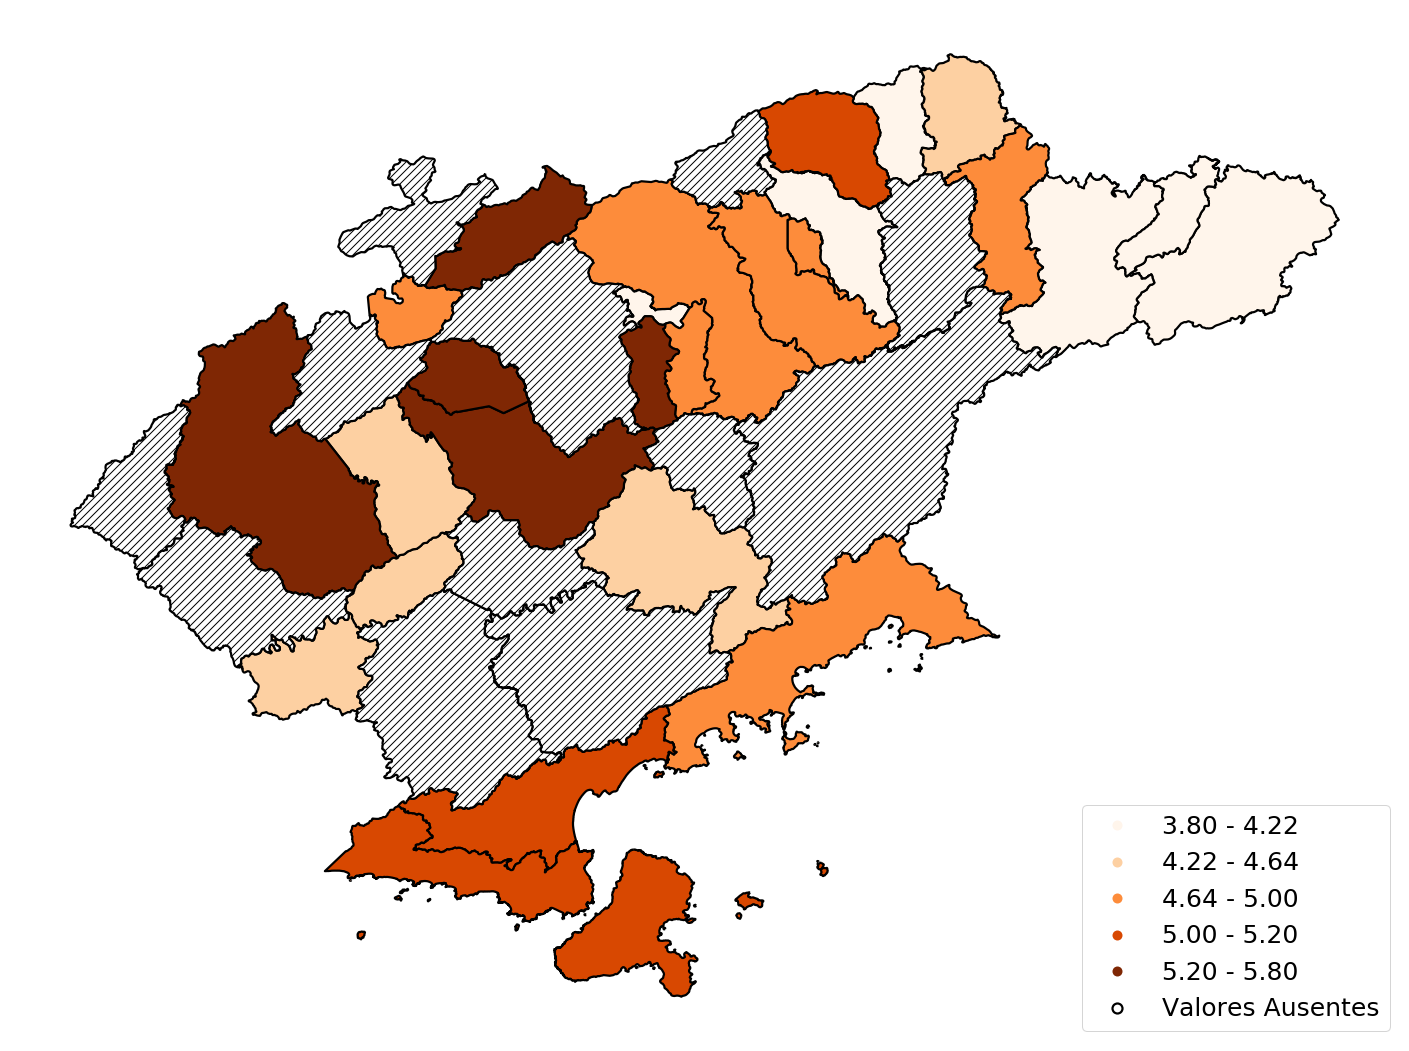

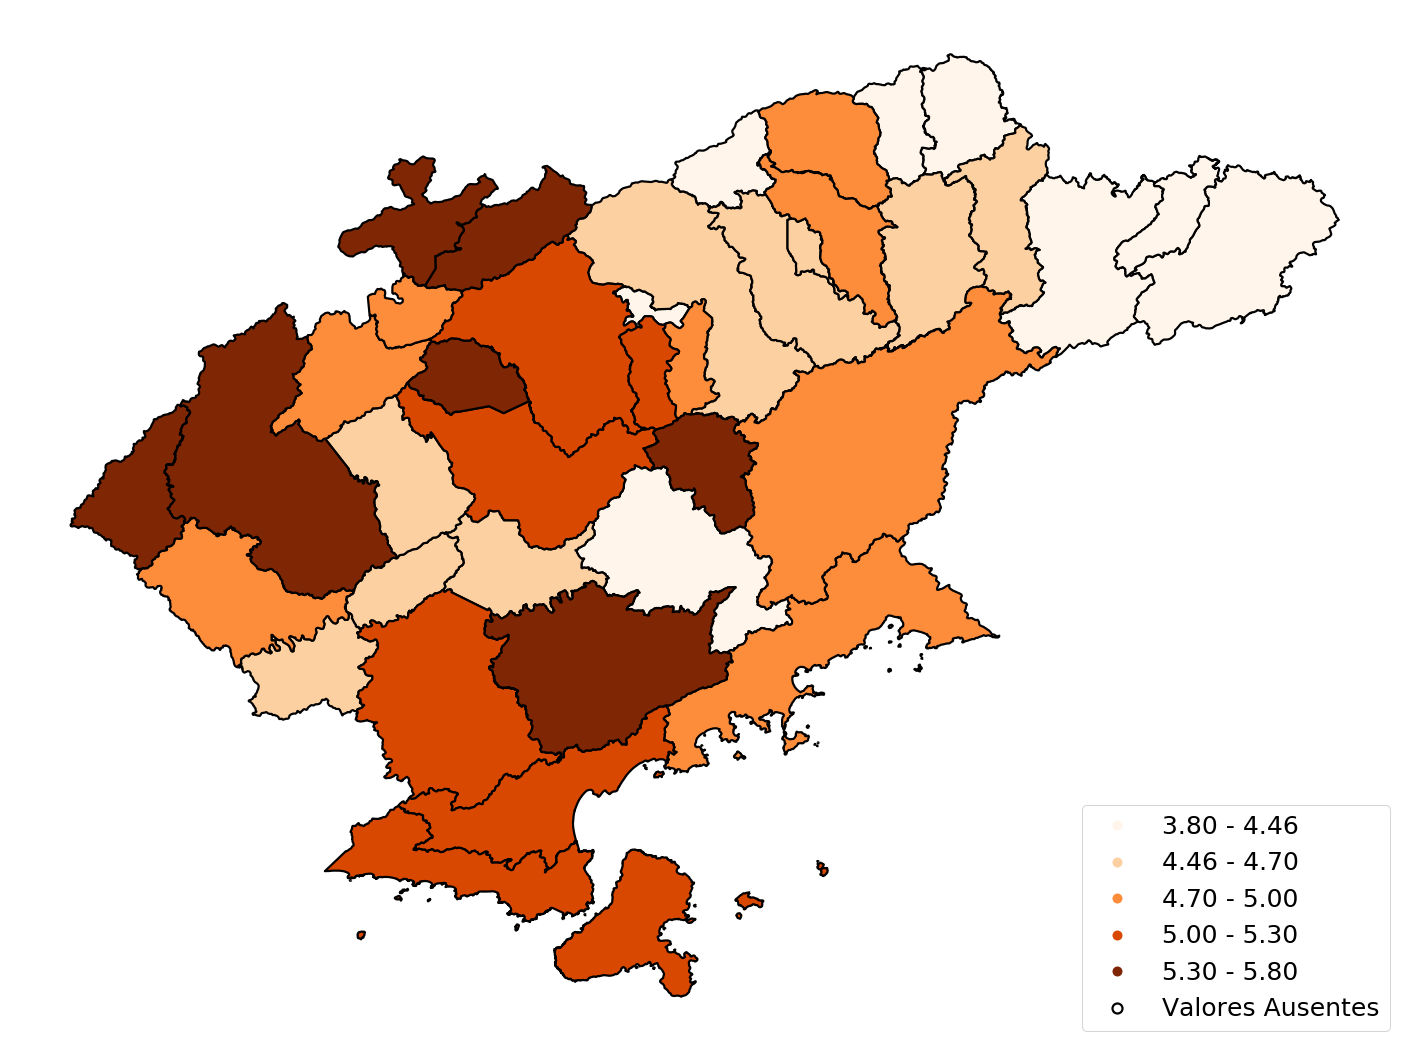

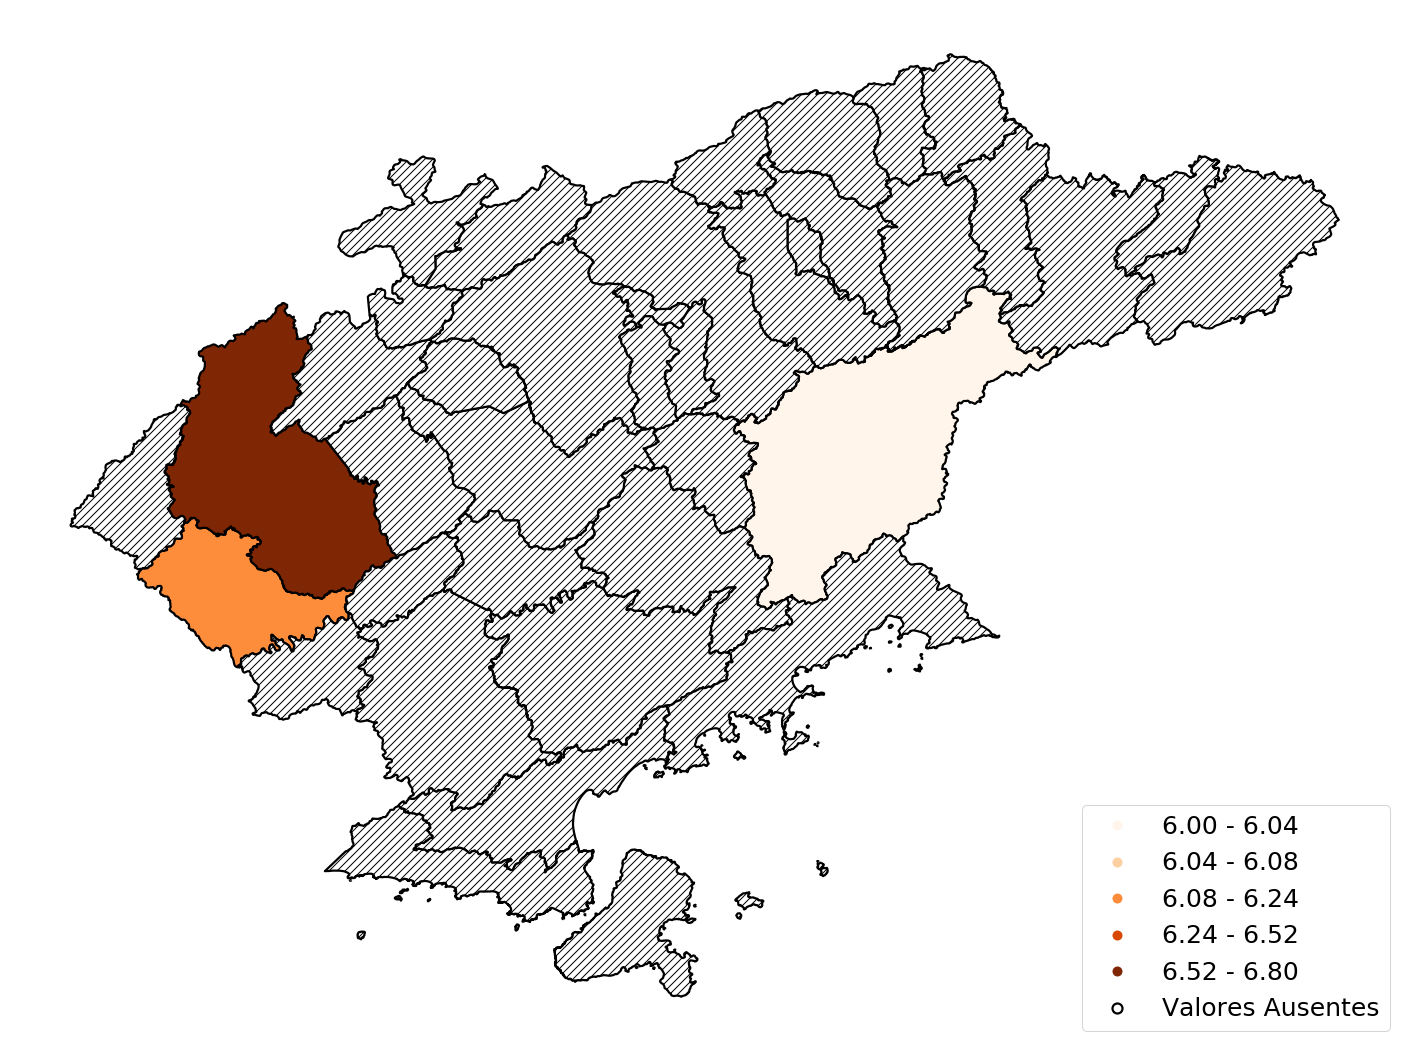

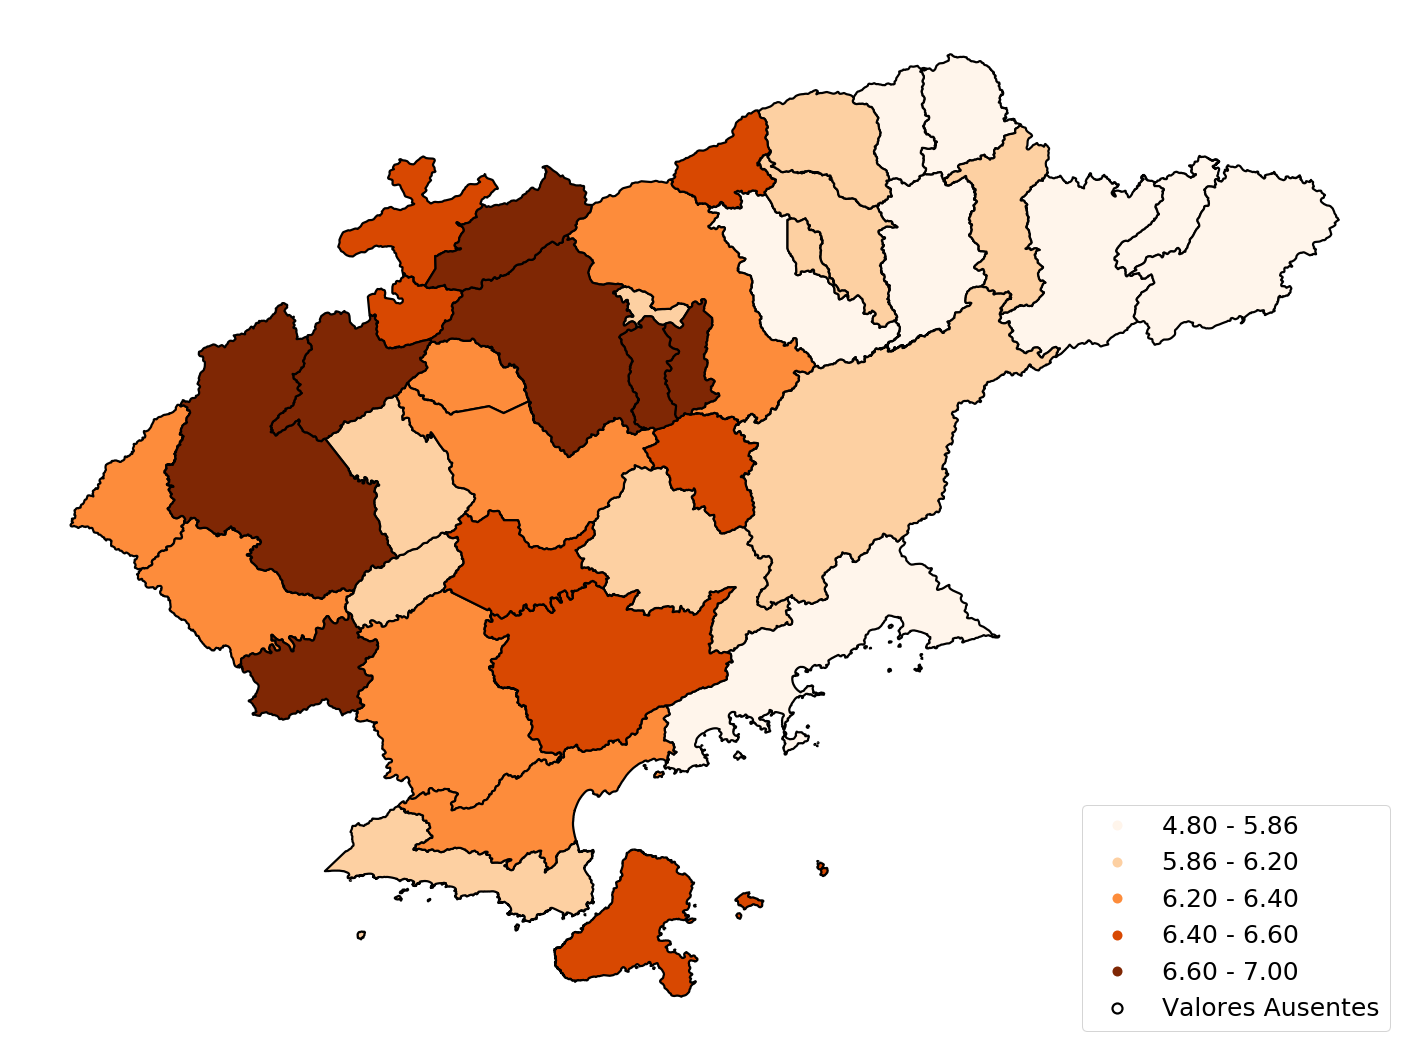

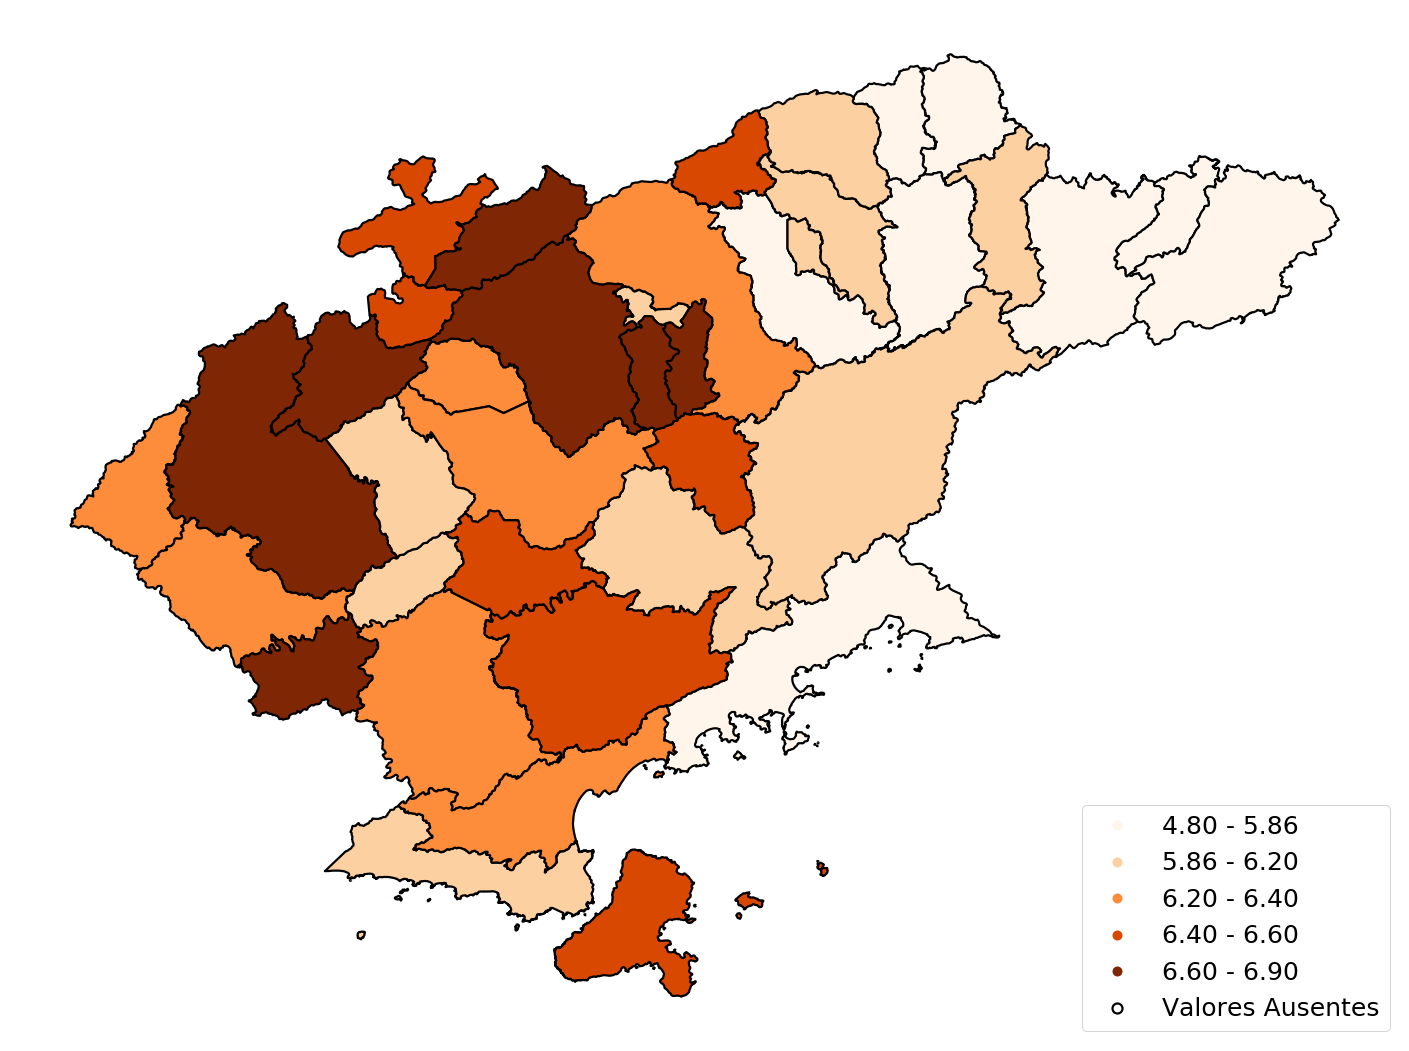

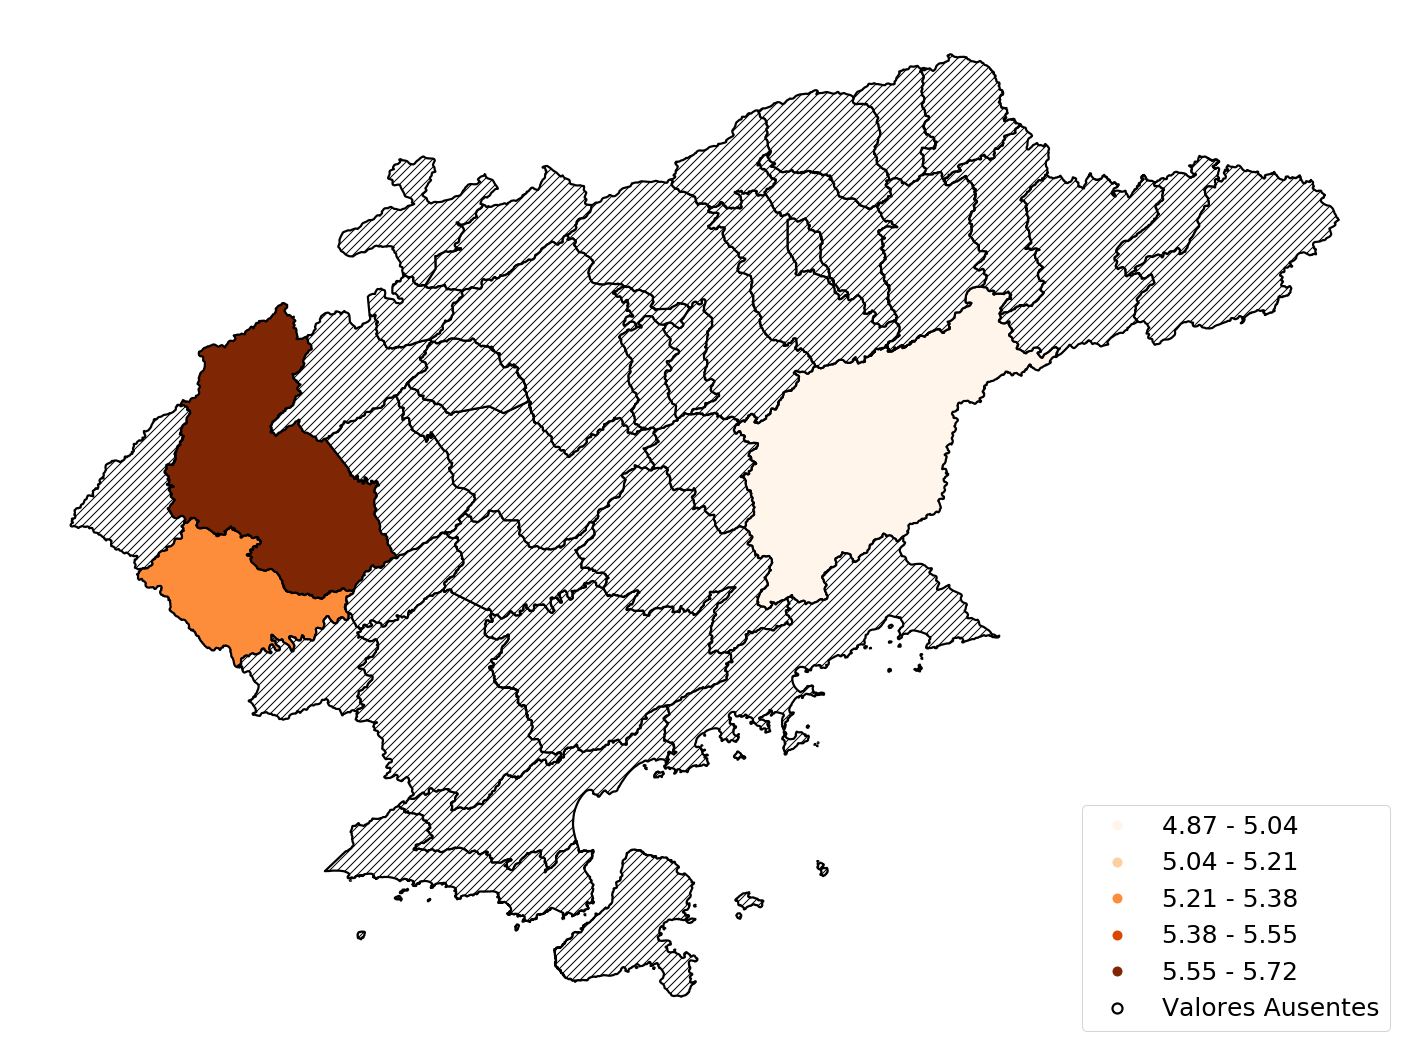

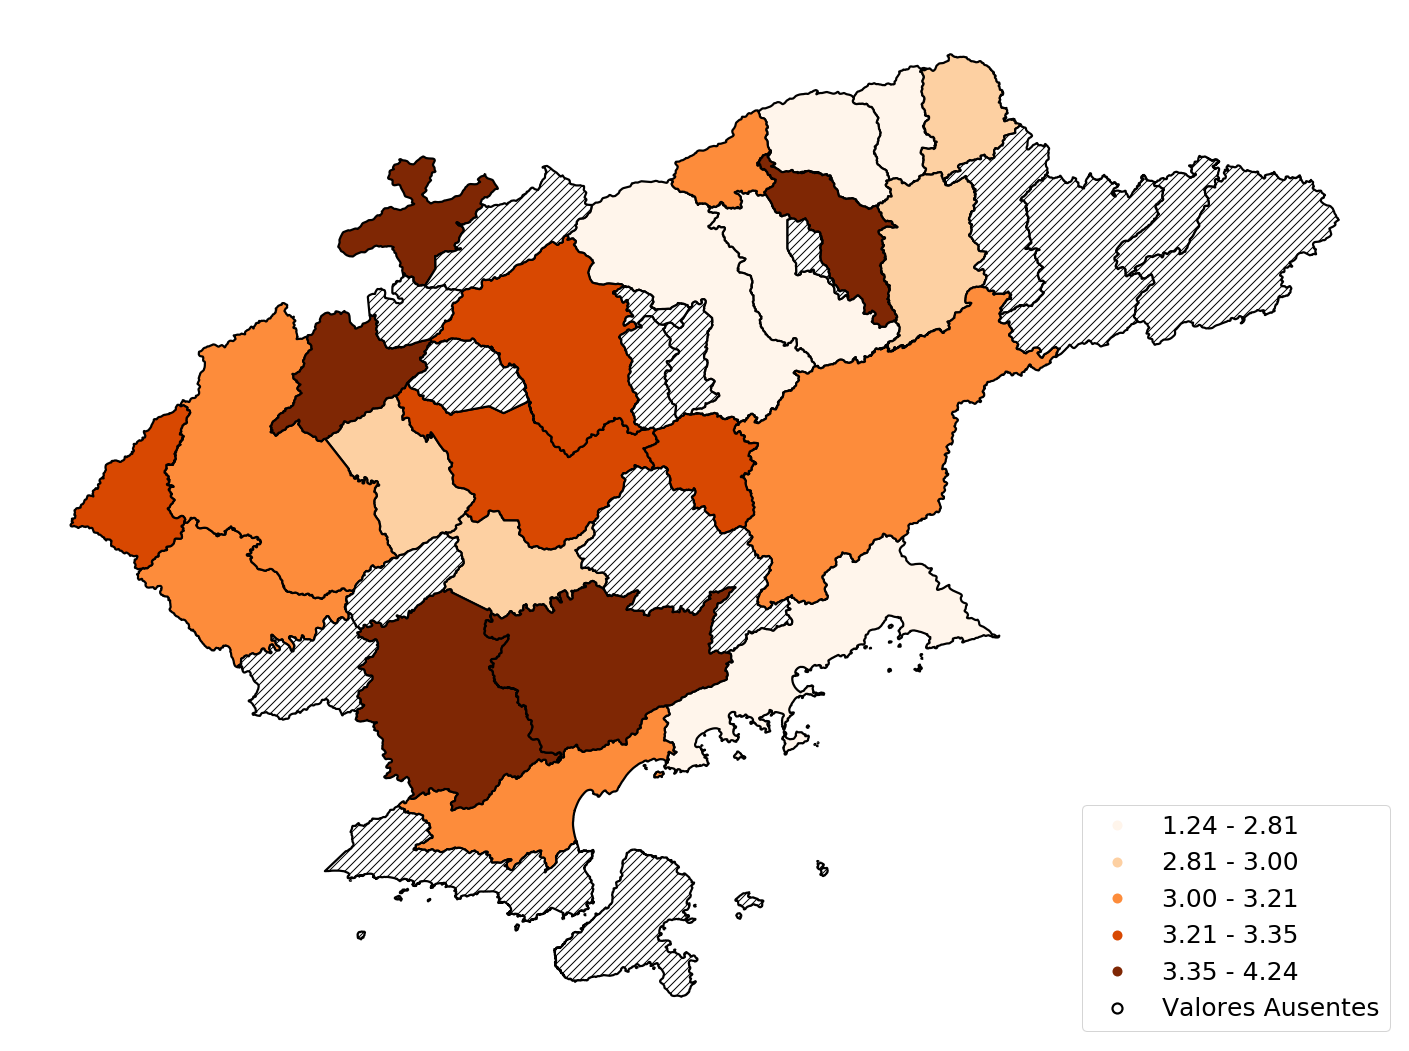

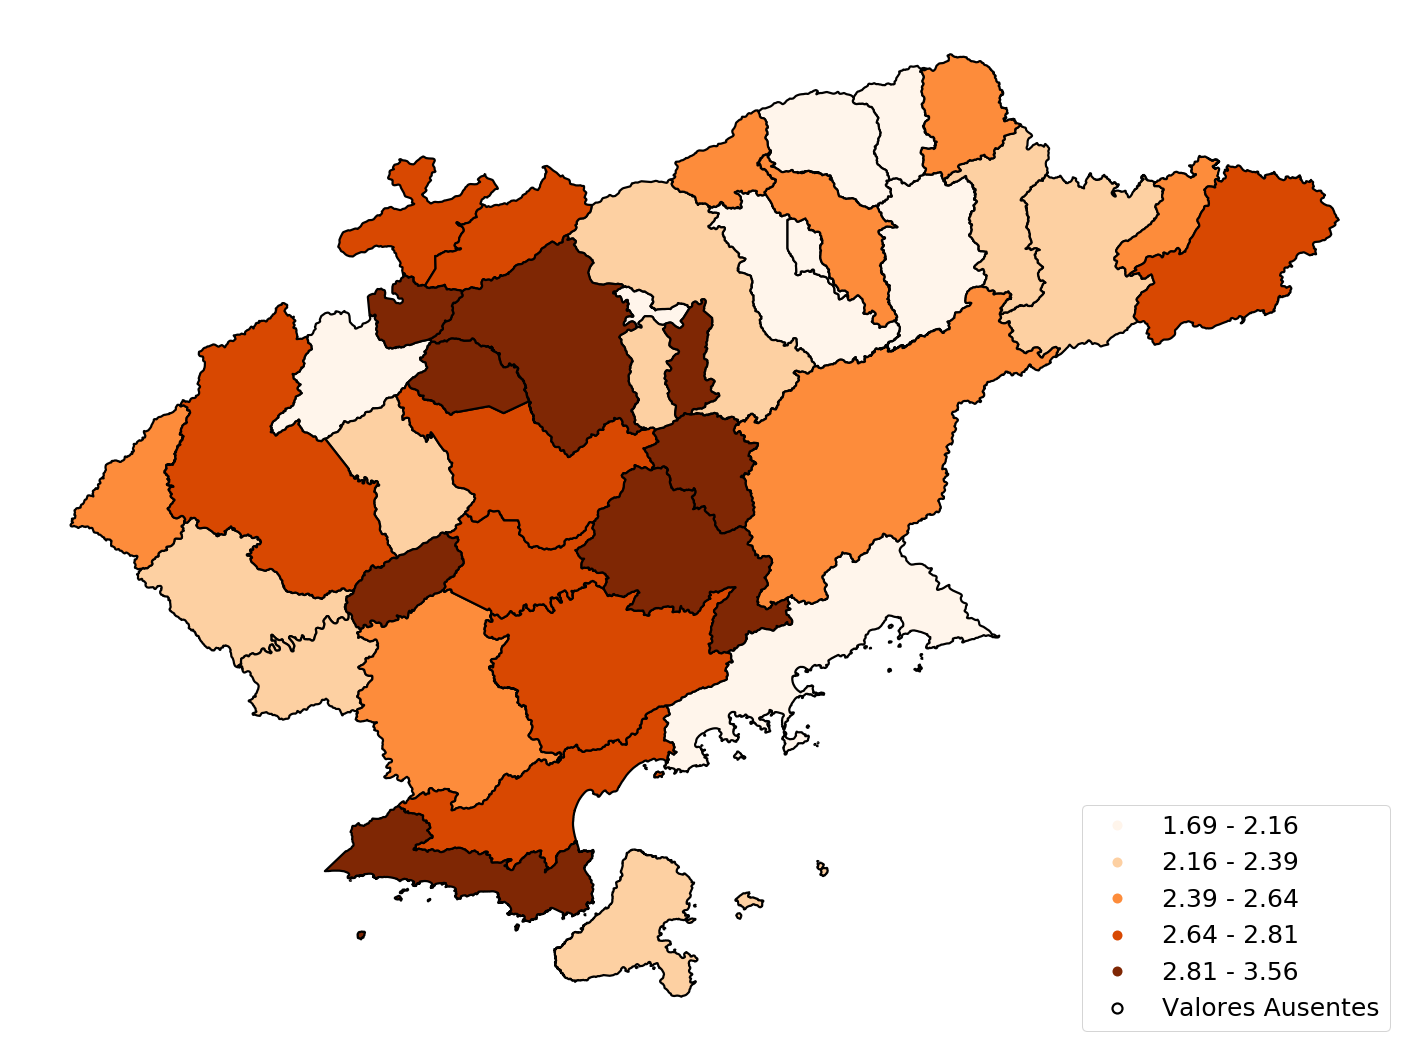

In [42]:
import yaml
themes = yaml.load(open('../themes/vale_themes.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['vale_bars']

var_file = {}

for var in variables:
    #variables name and file dict
    ano = max(df['ano'])
    file_name = unidecode.unidecode(var.lower().replace(' ','_').replace('-',''))
    var_file[f'{var} ({ano})'] = file_name
    
    #plot bars
    fig = vis_graphs.plot_bars(dd,var,themes)
    plot(fig, filename=f"../../sample_pages/pages/indicadores_vale/pages/educacao/images/bars/{file_name}.html", auto_open=False)
    
    #plot maps
    fig_map = vis_graphs.plot_map(dd,sp,var)
    fig_map.savefig(f"../../sample_pages/pages/indicadores_vale/pages/educacao/images/maps/{file_name}.png", bbox_inches='tight')
    

In [9]:
for var in var_file.keys():
    print(f"<option value='{var_file[var]}'>{var}</option>")

<option value='concluintes_do_ensino_fundamental'>Concluintes do Ensino Fundamental (2013)</option>
<option value='concluintes_do_ensino_medio'>Concluintes do Ensino Médio (2013)</option>
<option value='matriculas_na_creche'>Matrículas na Creche (2019)</option>
<option value='matriculas_na_educacao_infantil'>Matrículas na Educação Infantil (2019)</option>
<option value='matriculas_na_preescola'>Matrículas na Pré-escola (2019)</option>
<option value='matriculas_no_ensino_fundamental'>Matrículas no Ensino Fundamental (2019)</option>
<option value='matriculas_no_ensino_medio'>Matrículas no Ensino Médio (2019)</option>
<option value='meta_do_indice_de_desenvolvimento_da_educacao_basica_(ideb)__ensino_fundamental__anos_finais__rede_estadual'>Meta do Índice de Desenvolvimento da Educação Básica (IDEB) - Ensino Fundamental - Anos Finais - Rede Estadual (2019)</option>
<option value='meta_do_indice_de_desenvolvimento_da_educacao_basica_(ideb)__ensino_fundamental__anos_finais__rede_municipal'>M

In [292]:


from lightning import Lightning

from numpy import random, zeros




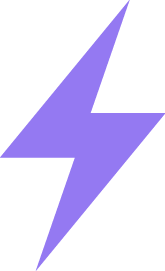

Problem connecting to server at http://public.lightning-viz.org
status code: 404


ValueError: Could not access server

In [293]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

In [294]:
from lightning import Lightning

lgn = Lightning(host="http://my-lightning-instance.herokuapp.com")

lgn.create_session()
lgn.create_session("provide an optional session name")

Lightning initialized
Problem connecting to server at http://my-lightning-instance.herokuapp.com
status code: 404


ValueError: Could not access server